# Hausarbeit: Gunshot-Classification

## I. Begriffsdefinitionen und exemplarischer Anwendungsfall


Die Identifizierung von Schusswaffentypen ist ein wichtiger Bestandteil der **Forensik** ([Dogan, 2021](https://doi.org/10.1016/j.apacoust.2021.107916); [Teng et al., 2024](https://doi.org/10.1016/j.scijus.2024.09.007)). **Akustische Schusswaffenerkennungssysteme** ermöglichen eine schnelle Meldung von Vorfällen, eine ungefähre Standortabschätzung und die Alarmierung von Sicherheitspersonal. Zusätzlich können sie stichhaltige Beweise in der Aufklärung von Verbrechen liefern. In den USA sind solche Systeme in mehr als 90 Städten aktiv ([Teng et al., 2024](https://doi.org/10.1016/j.scijus.2024.09.007)). Allerdings wurde in der Vergangenheit bei der Implementierung der Kostenfaktor sowie auch die Zuverlässigkeit von solchen Systemen infrage gestellt ([Singh et al., 2021](https://doi.org/10.3390/s21217320)).Die reine Identifikation von Schussgeräuschen liefert nur begrenzte Informationen. Ein System, das nicht nur erkennt ob ein Schuss gefallen ist, sondern auch welche Waffe abgefeuert wurde, könnte Ermittlungs- und Einsatzkräfte erheblich unterstützen. In diesem Projekt untersuchen wir, inwieweit Convolutional Neural Networks (CNNs) akustische Muster in Audiodaten unterscheiden können, um verschiedene Schusswaffen zu klassifizieren.
 
Grundlage für eine Klassifikation von Tönen ist die Umwandlung eines analogen Signals (bspw. ein Ton) in ein digitales Signal. Ein analoges Signal lässt sich als kontinuierliche, physikalische Erscheinung beschreiben, die zugleich Träger einer Nachricht ist. Um dieses Signal digital zu verarbeiten, muss diese Abfolge von Tonsignalen in diskrete Werte bzw. Wertefolgen umgewandelt werden ([Schüßler, 2008, S.1 ff.](https://books.google.com.do/books?id=08kfBAAAQBAJ)). Analoge Signale laufen über einen Zeitraum in Kurvenformen, die sich durch stufenlose Übergänge auszeichnen. Um die Werte dieser Kurve zu digitalisieren, werden diese Werte mittels einer **Abtastrate** (sampling rate) gemessen. Diese Rate bestimmt, wie häufig Werte der analogen Kurve gemessen werden und somit wie genau diese Messung ist. Dabei wird der Ausschlag (**Amplitude**) der Lautstärke dieser Messung angegeben. Je höher die Lautstärke des Signals am Messpunkt, desto größer ist die Abweichung vom 0-Wert, der völlige Stille beschreibt. Die **Quantisierung** der gemessenen Werte beschreibt den Prozess, der diese Werte stufenweise diskret miteinander abbildet ([Hulatt, 2023](https://www.studysmarter.de/schule/informatik/technische-informatik/quantisierung/)). Die Abtastrate wird im Fall von Tönen in Hertz (Hz) angegeben. Dementsprechend ist eine digitalisierte Audiodatei mit einer höheren Abtastrate dem analogen Signal näher als eine Datei mit einer geringeren Abtastrate. Ein weiterer Faktor ist die **Auflösung** einer Amplitude von jeder Abtastung, die in Bits angegeben wird. 16 Bits entsprechen in diesem Fall einer Skala von 65.536 Werten (2^16). Je mehr Bits, desto höher ist die Genauigkeit einer jeden Messung. Die **Bitrate** oder **Bittiefe** ist eine Kombination aus der Abtastrate und der Auflösung. Sie beschreibt die Datenmenge, die pro Sekunde verarbeitet wird. Bspw. lässt sich hier die Bitrate für eine CD berechnen. Bei diesem Medium sind es üblicherweise 1.411 Kilobits pro Sekunde (kbps). Das entspricht der folgenden Formel: 16 Bit * 44100 Hz * 2 Tonspuren bei einer Stereoaufnahme ([Baumann, 2012](https://www.baumannmusic.com/de/2012/sampleratehz-und-khz-aufloesung-bit-und-bitrate-kbits/)). 

Die angeführten Faktoren beeinflussen die Dateigröße und somit den notwendigen Speicherplatz sowie die notwendige Rechenkapazität, um diese Daten zu verarbeiten. Aus diesem Grund werden die Dateien häufig komprimiert. Wie die Datei komprimiert wird, gibt der gewählte **Codec** oder auch Decoder an. Dabei gilt WAV als verlustfreier Codec und bspw. MP3 als verlustbehafteter Codec. Unterschiedliche Decoder erlauben verschiedene Bitraten. WAV erlaubt 1.411 kbps, MP3 mit 22050 Hz bis zu 160 kbps und mit 44100 Hz bis zu 320 kbps ([Urbano et al., 2014](https://www.researchgate.net/publication/311425357_What_is_the_effect_of_audio_quality_on_the_robustness_of_MFCCs_and_chroma_features)). Streamingdienste nutzen eine Bitrate von nur 96 bis 160 kbps, um das Datenvolumen, das übertragen wird, zu reduzieren und somit unterbrechungsfreies Streaming zu ermöglichen ([Adobe, 2025](https://www.adobe.com/at/creativecloud/video/discover/audio-bitrate.html)). In Bezug auf den Anwendungsfall ist ebenfalls von Interesse, ob eine Klassifizierung von Schüssen mit stärker komprimierten Daten umgesetzt werden kann, da Schüsse in Echtzeit klassifiziert werden sollen und die hohen Speicher- und Rechenkapazitäten, die WAV-Dateien voraussetzen, zu Verzögerungen führen kann.

Für wissenschaftliche Analysen ist jedoch ein verlustfreies Format entscheidend, da Komprimierungsartefakte die Genauigkeit der Merkmalsextraktion beeinflussen können. Aus diesem Grund wird in der vorliegenden Arbeit zunächst das WAV-Format verwendet. Es soll untersucht werden, inwiefern Schusswaffen mithilfe von Convolutional Neural Networks (CNNs) klassifiziert werden können. Der Fokus dieser Arbeit liegt somit auf dem Deep-Learning-Bereich und nicht auf klassischen Machine-Learning-Ansätzen. Für das Modelltraining und die Klassifikation werden zwei Datensätze mit insgesamt 1.056 Audiodateien im WAV-Format verwendet. Neben dem CNN-Ansatz wird anfangs auch der Ansatz eines MLPs verfolgt, um einen Vergleich zwischen hierarchisch organisierten Netzen (CNNs) und vollverbundenen Netzen (MLPs) zu ermöglichen. Hierfür werden im Verlauf dieser Arbeit neben mehrdimensionalen Bilddateien auch eindimensionale Numpy-Arrays erstellt und für die Modellierungsphase gespeichert.

Deep Learning, eine Unterkategorie von maschinellem Lernen, hat in den vergangenen zehn Jahren verstärkt Einzug in die Audioklassifikation erhalten. In vielen Studien zur Audioklassifikation erwiesen sich Spektrogramme als Input für CNNs als besonders effektiv ([Schlüter & Böck, 2014](http://doi.org/10.1109/ICASSP.2014.6854953); [Kim & Moon, 2016](https://doi.org/10.1109/LGRS.2015.2491329); [Wyse, 2017](https://doi.org/10.48550/arXiv.1706.09559)). [Li et al. (2022)](https://doi.org/10.3390/app12115526) merken jedoch kritisch an, dass der Einzug von Deep-Learning-Ansätzen in die Schusserkennung zwar tendenziell zu einer höheren Genauigkeit bei der Klassifikation geführt hat, gleichzeitig aber auch zu höheren Anforderungen an die Rechenleistung. Dadurch sinkt die Geschwindigkeit bei der Schusserkennung, was wiederum zu einer eingeschränkten Anwendbarkeit in Echtzeit führt. Die Idee, eine Schusserkennung in Echtzeit auch auf kleinen tragfähigen Geräten zu ermöglichen, ohne dabei Speicherkapazität, Batterielaufzeit oder CPU-Leistung zu sehr zu beanspruchen, haben [Ellen und Linnea (2022)](https://lup.lub.lu.se/luur/download?func=downloadFile&recordOId=9090317&fileOId=9090321) verfolgt.


**Darstellung eines Schussgeräusches**

Mündungsknall "Muzzle Blast":
* Wenn ein Schuss abgegeben wird, entsteht eine explosive Druckwelle, die weniger als 3 Millisekunden dauert. Diese Schallwelle breitet sich mit Schallgeschwindigkeit aus.

Aufnahme je nach Entfernung:

* Nah: Mikrofon empfängt hauptsächlich den direkten Mündungsknall
* Weit: Direkter Schallweg kann blockiert sein, empfangenes Signal zeigt Ausbreitungseffekte, Mehrwege-Reflexionen und Nachhall

Bedeutung der Fernfeld-Effekte:

* Ausbreitungseffekte: Schall wird durch Atmosphäre verändert
* Mehrwege-Reflexionen: Schall erreicht Mikrofon über verschiedene Wege (Reflexionen an Objekten)
* Nachhall: Überlagerung vieler Reflexionen erzeugt diffusen Klang

Bei großer Entfernung dominieren also nicht mehr der direkte Schuss, sondern die komplexen akustischen Wechselwirkungen mit der Umgebung ([Maher, 2007, S. 109 ff.](https://www.montana.edu/rmaher/publications/maher_ieeesafe_0407_109-113.pdf)).

**Begriffsdefinitionen zur Interpretation eines akustischen Signals:**

**RMS (Root Mean Square):**
* Effektivwert eines Signals - berechnet die durchschnittliche Energie über die Zeit ([Major Mixing, 2013](https://majormixing.com/what-is-rms-in-audio-world/)).

**Envelope (Hüllkurve):**
* Beschreibt, wie sich die Amplitude über die Zeit verändert. Oft als ADSR dargestellt: Attack, Decay, Sustain, Release ([Sound on Sound, 2025](https://www.soundonsound.com/glossary/adsr-attack-decay-sustain-release)).

**Zusammenhang:** 
* Amplitude = momentane Signalstärke
* Envelope = zeitlicher Verlauf
* RMS = energetischer Durchschnitt

**Dezibel (dB):**
* Maßeinheit für Lautstärke. Logarithmische Skala: 0 dB = Hörschwelle, 60 dB = Gespräch, 120 dB = Schmerzgrenze ([Decibel Pro, 2025](https://decibelpro.app/blog/decibel-chart-of-common-sound-sources/)).


## II. Data Wrangling und explorative Datenanalyse

### Datenbeschaffung

Der Datensatz, der für diese Arbeit genutzt wird, ist ein auf Kaggle zugänglicher Datensatz, der 851 WAV Dateien von neun Schusswaffen enthält. Diese Dateien sind mehrheitlich 2 Sekunden lang und enthalten die Töne, die eine Waffe abgibt, wenn sie betätigt wird. Der Datensatz lässt sich mittels einer zip.-Datei downloaden und enthält Unterordner, die jeweils die Audiodateien der Waffe enthalten. Somit ist dieser Datensatz bereits klassifiziert. Der Datensatz ist über folgenden Link abrufbar: https://www.kaggle.com/datasets/emrahaydemr/gunshot-audio-dataset?resource=download. Da diese Dateien als verlustfrei gelten, ist die durchschnittliche Abtastrate mit 47.097 Hz hoch. Diese Rate kann jedoch auch von MP3 Dateien gespeichert werden, die typischerweise 48.000 oder 24.000 Hz beinhalten ([Lutzky et al., 2004](https://www.iis.fraunhofer.de/content/dam/iis/de/doc/ame/conference/AES-116-Convention_guideline-to-audio-codec-delay_AES116.pdf)).
Zusätzlich wird noch ein zweiter Datensatz für diese Arbeit genutzt. Dieser enthält insgesamt 205 WAV Dateien von zwei Schusswaffen, die auch schon im ersten Datensatz vorkommen (AK47 und M249). Abrufbar ist der besagte Datensatz unter folgendem Link: https://www.kaggle.com/datasets/furkanyilmaz26/rifle-gunshots.

Eine weitere Unterteilung der Schusswaffen anhand des Schussmusters in Mehrfach- und Einfachschusswaffen ist nicht möglich, da sechs der neun Waffenklassen beide Schussmuster aufweisen können. Eine Unterscheidung wäre im Hinblick auf die Analyse nützlich gewesen, da man anhand der Ausschläge der Messung bereits eine Vorklassifikation aufgrund des Schussmusters hätte durchführen können. Folgend ist eine Übersicht der Schusswaffen (inklusive ihres Schussmusters) zu finden: 

* M249, leichtes Maschinengewehr, Mehrfachschuss
* AK-47, Sturmgewehr, Mehrfach- und Einfachschuss
* IMI Desert Eagle, Pistole (halbautomatisch), Einfachschuss
* M16, Sturmgewehr (je nach Version), Mehrfach- und Einfachschuss
* M4, Karabiner, Mehrfach- und Einfachschuss
* MG-42, schweres Maschinengewehr, Mehrfachschuss
* MP5, Maschinenpistole, Mehrfach- und Einfachschuss
* AK-12, modernes Sturmgewehr, Mehrfach- und Einfachschuss
* Zastava M92, Sturmgewehr, Mehrfach- und Einfachschuss

#### Direktes Laden über kaggle

In [100]:
#!pip install kagglehub

In [101]:
# import kagglehub
# Download latest version

# Hauptdatensatz
# path = kagglehub.dataset_download("emrahaydemr/gunshot-audio-dataset")

# sekundäre Datenquelle
# path = kagglehub.dataset_download("furkanyilmaz26/rifle-gunshots")

# print("Path to dataset files:", path)

#### Separates Laden und Einlesen der Daten

##### Module importieren

Für die Verarbeitung der Audiodateien wird in dieser Arbeit hauptsächlich das Python-Paket **librosa** in der Version 0.11.0 genutzt, das auf Audio-Analysen ausgelegt ist ([librosa, 2025](https://librosa.org/doc/latest/index.html)). Die Module und Funktionalitäten können in den verschiedenen Schritten der Datenbeschaffung und Analyse eingetzt werden. 
* In der Data-Wrangling-Phase, also bei der Beschaffung und ersten Ansicht der Daten, ist vor allem librosa.core hilfreich. Mit librosa.load können Audiodateien eingelesen und in ein einheitliches Zeit-Serien-Format (NumPy-Arrays) konvertiert werden. Dazu bietet librosa.core grundlegende Werkzeuge wie Spektrogramm-Berechnung oder Resampling, die bereits hier zur ersten Sichtprüfung hilfreich sind. Für die visuelle Inspektion der Daten unterstützt zusätzlich librosa.display, da so Wellenformen, Spektrogramme oder Chromagramme direkt mit Matplotlib visualisiert und erste Hypothesen über die Signalstruktur entwickelt werden können.
* In der Preprocessing-Phase kommen vor allem librosa.feature, librosa.effects  und librosa.util zum Einsatz. Mit librosa.feature werden aus den Rohsignalen aussagekräftige Merkmale extrahiert, zum Beispiel Mel-Spektrogramme, MFCCs oder Chromagramme, die später als Input für ML-Modelle dienen.  Mit librosa.effects lassen sich Audiosequenzen transformieren, etwa durch Time-Stretching oder Pitch-Shifting, was besonders für Data Augmentation im Preprocessing relevant ist, um Trainingsdaten zu erweitern. librosa.util schließlich liefert nützliche Helferfunktionen, z. B. zur Normalisierung, Padding oder Zentrierung, die sicherstellen, dass alle Audioinputs in konsistenter Länge und Skala vorliegen.
* Im Modelltraining werden die zuvor extrahierten und aufbereiteten Features (meist aus librosa.feature) an das ML-Modell weitergegeben. Während dieser Phase stehen librosa-Funktionen weniger im Vordergrund, da hier der Schwerpunkt auf Frameworks wie TensorFlow oder sklearn liegt. Allerdings entscheidet die Qualität der mit librosa vorbereiteten Features stark über den Trainingserfolg.
* Auch beim Modelltuning wird indirekt auf librosa zurückgegriffen beim Testen von unterschiedlichen Feature-Darstellungen (z.B. MFCC vs. Mel-Spektrogramm oder verschiedene Zerlegungsmethoden über librosa.decompose). Dadurch wird die Hyperparameter-Suche sinnvoll erweitert.
* Während der Modellevaluierung und im anschließenden Modellvergleich und der Auswertung hilft erneut librosa.display. Damit lassen sich z. B. die durch das Modell erkannten Strukturen mit den Originalsignalen visuell gegenüberstellen – etwa ein vorhergesagtes Beat-Raster im Vergleich zur echten Onset-Struktur. Außerdem können mit den Hilfsmodulen (librosa.util) die Features konsistent normalisiert und zwischen unterschiedlichen Versuchen vergleichbar gemacht werden.

In [ ]:
# Zu installierende Bibliotheken, falls nicht vorhanden

!pip install librosa
!pip install tensorflow
!pip install tensorflow-io

Benötigte Bibliotheken

In [103]:
# GRUNDLEGENDE DATENVERARBEITUNG
import os                    # Dateisystem-Operationen (Pfade, Ordner erstellen)
import glob                  # Datei-Pattern-Matching für rekursive Dateisuche
import pandas as pd          # DataFrame-Operationen für Datenorganisation
import numpy as np           # Numerische Berechnungen und Array-Operationen
import random                # Zufallszahlen für Sampling
import sys                   # System-spezifische Parameter und Funktionen
from pathlib import Path     # Objektorientierte Handhabung von Dateisystempfaden
from collections import defaultdict  # Erweiterte Dictionary-Funktionalität
import math                  # Grundlegende mathematische Funktionen


# AUDIO-VERARBEITUNG
import librosa               # Audio-Loading, Spektrogramm-Erstellung, Feature-Extraction
import librosa.display       # Visualisierung von Audio-Features (Spektrogramme, Wellenformen)
from scipy.signal import find_peaks   # Peak-Detection in Signalen

# VISUALISIERUNG
import matplotlib.pyplot as plt  # Plotting und Diagrammerstellung
import seaborn as sns            # Plotting und Diagrammerstellung
from tqdm.notebook import tqdm   # Fortschrittsbalken für Notebook-Umgebungen

# MACHINE LEARNING - CLASSICAL
from sklearn.model_selection import train_test_split    # Daten-Splitting
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Label-Encoding, Feature-Skalierung
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Modell-Evaluation
from sklearn.model_selection import train_test_split   # Daten-Splitting für Training/Test
from sklearn.preprocessing import LabelEncoder, StandardScaler # Label-Encoding, Feature-Skalierung

# DEEP LEARNING
import tensorflow as tf                                 # Deep Learning Framework
import tensorflow_io as tfio                            # erweitert TensorFlow für das Laden spezieller Datenformate
from tensorflow.keras.models import Sequential         # Sequentielle Modell-Architektur
from tensorflow.keras.applications import EfficientNetB0  # Modernes, vortrainiertes Modell (Transfer Learning)
from tensorflow.keras.models import Model                 # Keras' Functional API für komplexe Modelle
from tensorflow.keras.layers import (                  # Neural Network Layers - Bausteine für Modell-Architektur & Augmentation
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, RandomTranslation, GlobalAveragePooling2D, RandomZoom, Input, ZeroPadding2D
)
from tensorflow.keras.utils import to_categorical, Sequence # One-Hot-Encoding für Labels und Erstellung von Custom Data Generatoren
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Callbacks zur Trainingssteuerung
from tensorflow import keras
from tensorflow.keras.optimizers import Adam         # Effizienter Optimierungs-Algorithmus
from tensorflow.keras import layers, models          # Lädt die Bausteine (Layer) und das Grundgerüst (Model) für das CNN
from tensorflow.keras.applications.efficientnet import preprocess_input  # Passt Bilder an das von EfficientNet erwartete Format an


# BILDVERARBEITUNG
from PIL import Image                                 # PIL für PNG-Dateien laden und verarbeiten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # Laden, Umwandeln & Augmentieren von Bildern für das Training

print('Alle Bibliotheken sind erfolgreich geladen!')

c:\python\envs\tfnew_env\Lib\site-packages\tensorflow_io\python\ops\__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['c:\\python\\envs\\tfnew_env\\Lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io_plugins.so']
caused by: ['c:\\python\\envs\\tfnew_env\\Lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io_plugins.so not found']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
c:\python\envs\tfnew_env\Lib\site-packages\tensorflow_io\python\ops\__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['c:\\python\\envs\\tfnew_env\\Lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so']
caused by: ['c:\\python\\envs\\tfnew_env\\Lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so not found']
  warnings.warn(f"file system plugins are not loaded: {e}")


Alle Bibliotheken sind erfolgreich geladen!


##### Dateien einlesen

In [104]:
# Festlegung des Hauptordners mit den einzelnen Waffen als Unterordnern

data_dir = "./Waffen" # Passen Sie hier Ihren Pfad zum Kaggle Waffen Audiodateien Datensatz Ordner an

# Liste aller Klassen (Ordnernamen)
classes = sorted(os.listdir(data_dir))

# Container für Pfade und Labels
data = []

for label in classes:
    class_path = os.path.join(data_dir, label)
    if not os.path.isdir(class_path):
        continue  # falls versehentlich eine Datei im Hauptordner liegt
    for file in os.listdir(class_path):
        if file.endswith(".wav"):   
            file_path = os.path.join(class_path, file)
            data.append([file_path, label])

# Umwandlung in DataFrame
df = pd.DataFrame(data, columns=["filepath", "label"])
print(df.head())

                    filepath  label
0   ./Waffen\AK-12\3 (1).wav  AK-12
1  ./Waffen\AK-12\3 (10).wav  AK-12
2  ./Waffen\AK-12\3 (11).wav  AK-12
3  ./Waffen\AK-12\3 (12).wav  AK-12
4  ./Waffen\AK-12\3 (13).wav  AK-12


### Eigenschaften der Dateien und Klassen

##### Anzahl Dateien je Klasse sowie Abtastraten

In [105]:
# Übersicht über die Dateien und den durchschnittlichen Hz-Wert pro Datei

print("Anzahl Dateien pro Klasse:\n", df["label"].value_counts())

sampling_rates = []
for root, dirs, files in os.walk(data_dir):
    for filename in files:
        if filename.endswith(".wav"):
            filepath = os.path.join(root, filename)
            sr = librosa.get_samplerate(filepath)
            sampling_rates.append(sr)
    # Berechnung der durchschnittlichen Abtastrate
    if sampling_rates: 
        durchschnitt = sum(sampling_rates) / len(sampling_rates)
        print(f"Durchschnittliche Abtastrate {root}:", durchschnitt, "Hz")

Anzahl Dateien pro Klasse:
 label
M249                201
AK-47               175
M4                  100
IMI Desert Eagle    100
M16                 100
MP5                 100
MG-42               100
AK-12                98
Zastava M92          82
Name: count, dtype: int64
Durchschnittliche Abtastrate ./Waffen\AK-12: 44100.0 Hz
Durchschnittliche Abtastrate ./Waffen\AK-47: 34283.882783882786 Hz
Durchschnittliche Abtastrate ./Waffen\IMI Desert Eagle: 37961.12600536193 Hz
Durchschnittliche Abtastrate ./Waffen\M16: 40083.50951374207 Hz
Durchschnittliche Abtastrate ./Waffen\M249: 37601.632047477746 Hz
Durchschnittliche Abtastrate ./Waffen\M4: 38945.090439276486 Hz
Durchschnittliche Abtastrate ./Waffen\MG-42: 39981.12128146453 Hz
Durchschnittliche Abtastrate ./Waffen\MP5: 40804.41478439425 Hz
Durchschnittliche Abtastrate ./Waffen\Zastava M92: 41060.32196969697 Hz


Die durchschnittliche Abtastrate der jeweiligen Waffenklassen weisen Unterscheidungen auf. Daraus schließend sollte in der Analyse eine Abtastrate gewählt werden, die für alle Waffenklassen angewendet werden kann. Die zu wählende Abtastrate ist in diesem Fall 22.050 Hz, da durch diese normierte Abtastrate jegliche Dateien verarbeitet werden können. Abtastraten zwischen 22.050 Hz und 44.100 Hz können zu Kompatibilitätsproblemen in den benötigten Modulen führen. Zudem ist die gewählte Abtastrate effizienter in der Rechenkapazität und somit ein Kompromiss zwischen Informationserhalt und Verarbeitungsgeschwindigkeit. 

##### Verteilung der Audioclips auf die Waffenklassen

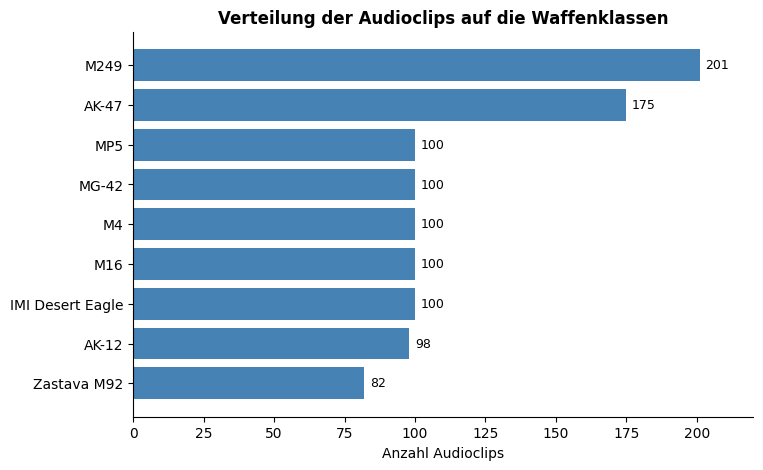

In [106]:
# Daten definieren
waffenklassen = ["AK-12", "AK-47", "IMI Desert Eagle", "M4", 
            "M16", "M249", "MG-42", "MP5", "Zastava M92"]
anzahl_audioclips = [98, 175, 100, 100, 100, 201, 100, 100, 82]

# Daten sortieren (absteigend nach Anzahl der Audioclips)
sorted_data = sorted(zip(anzahl_audioclips, waffenklassen), reverse=True)
anzahl_audioclips_sorted, waffenklassen_sorted = zip(*sorted_data)

# Horizontales Balkendiagramm erstellen
plt.figure(figsize=(8, 5))  # Größe des Diagramms festlegen
bars = plt.barh(waffenklassen_sorted, anzahl_audioclips_sorted, color=['steelblue'])  # Horizontale Balken verwenden
plt.gca().invert_yaxis() # Achse umkehren, damit der längste Balken oben erscheint
plt.xlim(0, 220)

# Nur die linke und untere Achsenlinie beibehalten
ax = plt.gca()
ax.spines['top'].set_visible(False)  # Obere Linie entfernen
ax.spines['right'].set_visible(False)  # Rechte Linie entfernen

# Werte am Ende der Balken anzeigen
for bar, value in zip(bars, anzahl_audioclips_sorted):
    plt.text(value + 2, bar.get_y() + bar.get_height()/2, str(value), 
             va='center', fontsize=9)

# Diagramm beschriften
plt.xlabel("Anzahl Audioclips") # Beschriftung für die x-Achse
plt.ylabel("") # y-Achse erhält keine zusätzliche Beschriftung, sodass nur die Waffenklassen angezeigt werden
plt.title("Verteilung der Audioclips auf die Waffenklassen", fontweight="bold")

# Diagramm anzeigen
plt.show()

Hieraus wird deutlich, dass sich die Audioclips nicht komplett gleichmäßig auf die unterschiedlichen Waffenklassen verteilen. Während sechs von neun Waffenklassen eine sehr gleichmäßige Verteilung mit Werten zwischen 98 und 100 Audioclips aufweisen, weisen die Waffenklassen M249 und AK-47 mit 201 bzw. 175 Audioclips eine deutliche höhere Anzahl auf. Die Verteilung der Audioclips auf die Waffenklasse Zastava M92 fällt mit 82 am geringsten aus. Eine stratifizierte Verteilung soll im weiteren Verlauf dieser Arbeit berücksichtigt werden, um Fehler beim Modelltraining (etwa eine Überanpassung auf die zwei Waffenklassen mit den meisten Audioclips) zu vermeiden.

##### Audiolängen der Dateien

In [107]:
# Analyse über Audiolängen
def analyze_audio_lengths(df, sr_target=22050):

    lengths = []
           
    for label, group in df.groupby("label"):
        class_lengths = []
                
        for fp in group["filepath"]:
            try:
                y, sr = librosa.load(fp, sr=sr_target, mono=True)
                length_sec = len(y) / sr
                lengths.append(length_sec)
                class_lengths.append(length_sec)
            except Exception as e:
                print(f"Fehler beim Laden von {fp}: {e}")
                        
        if class_lengths:
            print(f"{label}: {len(class_lengths)} Dateien, "
                  f"Ø{np.mean(class_lengths):.2f}s, "
                  f"Min: {np.min(class_lengths):.2f}s, "
                  f"Max: {np.max(class_lengths):.2f}s")
                     
    if lengths:
        print(f"\nGesamt: {len(lengths)} Dateien")
        print(f"Durchschnittslänge: {np.mean(lengths):.2f}s")
        print(f"Längenbereich: {np.min(lengths):.2f}s - {np.max(lengths):.2f}s")

print("\n=== AUDIO-LÄNGEN ANALYSE ===")
analyze_audio_lengths(df)


=== AUDIO-LÄNGEN ANALYSE ===
AK-12: 98 Dateien, Ø11.70s, Min: 1.00s, Max: 360.00s
AK-47: 175 Dateien, Ø2.02s, Min: 2.00s, Max: 4.00s
IMI Desert Eagle: 100 Dateien, Ø2.00s, Min: 2.00s, Max: 2.00s
M16: 100 Dateien, Ø2.00s, Min: 2.00s, Max: 2.00s
M249: 201 Dateien, Ø2.00s, Min: 2.00s, Max: 2.00s
M4: 100 Dateien, Ø2.00s, Min: 2.00s, Max: 2.00s
MG-42: 100 Dateien, Ø2.00s, Min: 2.00s, Max: 2.00s
MP5: 100 Dateien, Ø2.00s, Min: 2.00s, Max: 2.00s
Zastava M92: 82 Dateien, Ø1.12s, Min: 1.00s, Max: 2.00s

Gesamt: 1056 Dateien
Durchschnittslänge: 2.84s
Längenbereich: 1.00s - 360.00s


#### Visualisierungen je Waffenklasse

Im folgenden Abschnitt werden beispielhafte Audio-Dateien aus unserem Datensatz visualisiert. Für die Visualisierung von  Audiosignalen gibt es unterschiedliche Möglichkeiten ([Jauss, 2023](https://ai.hdm-stuttgart.de/news/2023/ki-im-audiobereich-grundlagen-signalverarbeitung-ml/)): 
* Die **Wellenform** visualisiert die Amplitude eines Signals in einem definierten Zeitbereich. Dabei wird der Bereich der Bittiefe auf einen Wert von -1 und +1 normiert. Das ist notwendig, um Audiosignale unabhängig von ihrer Bittiefe miteinander zu vergleichen. Während ein Signal mit 16 Bit (2^16) 65.536 Amplitudenstufen hat, enthält ein Signal mit 8 Bit (2^8) lediglich 256 Amplitudenstufen. Da diese Werte allerdings das gleiche Signal abbilden können, ist für eine Vergleichbarkeit die Normalisierung notwendig.
* Das **Spektrogramm** stellt im Gegensatz zur Wellenform nicht bloß die Lautstärke eines Signals dar, sondern betrachtet mit Hilfe der **Kurzzeit-Fourier-Transformation (STFT)** auch die verschiedenen Frequenzen eines Signals. Dabei können allerdings nur kleine Abschnitte (**Frames**) eines Signals betrachtet werden. Bei zu kleinen Frames (z.B. 32 Abtastungen) sind die verschiedenen Frequenzen eines Signals schwer zu unterschieden. Bei zu großen Frames hingegen (z.B 2048 Abtastungen) sind mehr Schwingungen der Messkurve und somit Frequenzen erkennbar, aber schnelle Änderungen in der Lautstärke des Signals nicht eindeutig erkennbar. Daher muss ein Kompromiss in der Frame-Größe gefunden werden, der  Frequenz-Zeit-Unschärferelation genannt wird. Das Spektrogramm erweitert demnach die Wellenform um eine Dimension. Auf der X-Achse wird die Zeit in größeren Abständen als bei der Wellenform dargestellt, weshalb von Spalten gesprochen wird, die zu Bändern (Bands) zusammengefasst werden. Auf der Y-Achse wird die Frequenz in Hz-Werten angegeben. Zudem wird die Amplitude bzw. Bittiefe in Form von Lautstärken farblich dargestellt.
* Das **Mel-Spektrogramm** ist ein für das menschliche Gehör modifiziertes Spektrogramm, das mit Hilfe der logarithmischen Mel-Skala Frequenzen auf der Y-Achse anpasst, da tiefere Frequenzen besser wahrgenommen werden können.
* **MFCCs (Mel-Frequency Cepstral Coefficients)** fassen die wichtigsten Klangmerkmale eines Audiosignals zusammen. Sie werden aus einem Mel-Spektrogramm berechnet, indem die Amplituden logarithmiert werden, was der menschlichen Lautstärke-Wahrnehmung näher kommt und leisere Töne sichtbarer macht. Anschließend wird das Spektrum dieses Spektrums (Cepstrum) gebildet. Das visuelle Ergebnis sind nicht die Frequenzen, sondern die Verteilung der Frequenzen.

Für den vorliegenden Datensatz wird zunächst für jede Waffenklasse eine zufällig ausgewählte Datei dargestellt, sowohl als Wellenform als auch als Mel-Spektrogramm. Diese Visualisierung hilft, die Unterschiede zwischen den Klassen sowie die charakteristischen Muster zu erkennen.

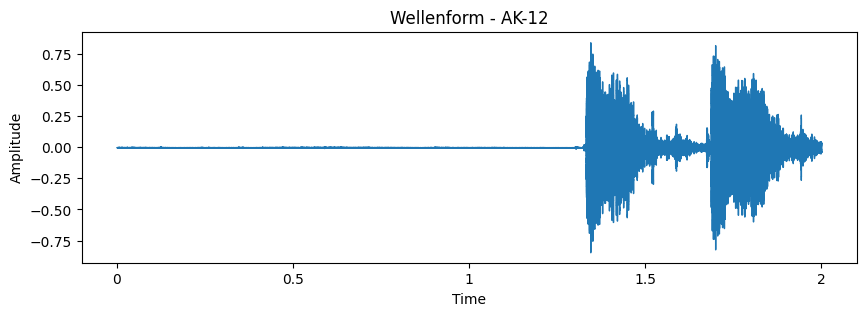

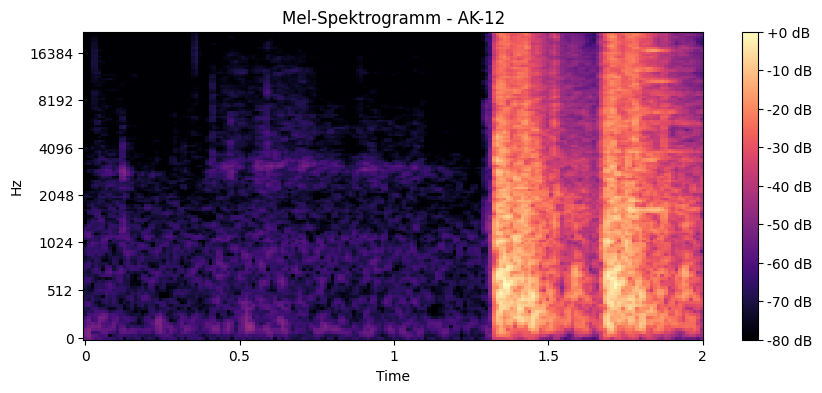

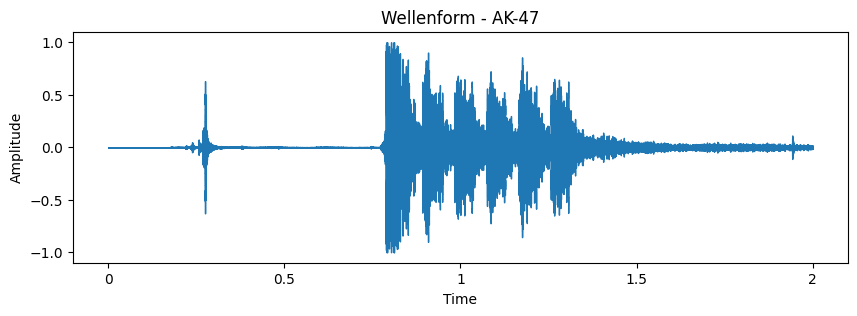

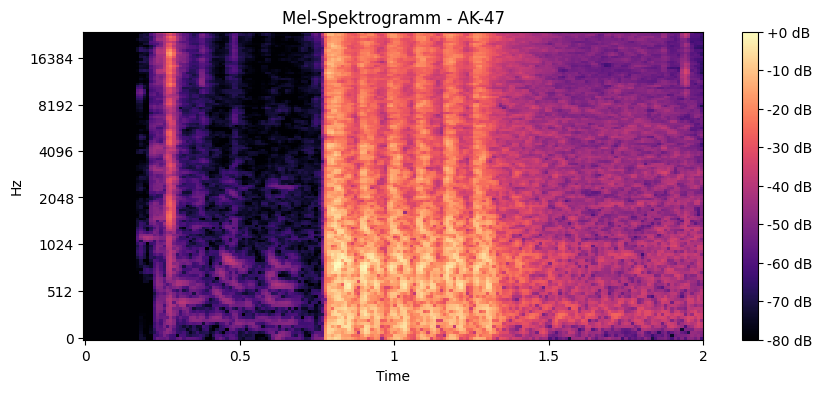

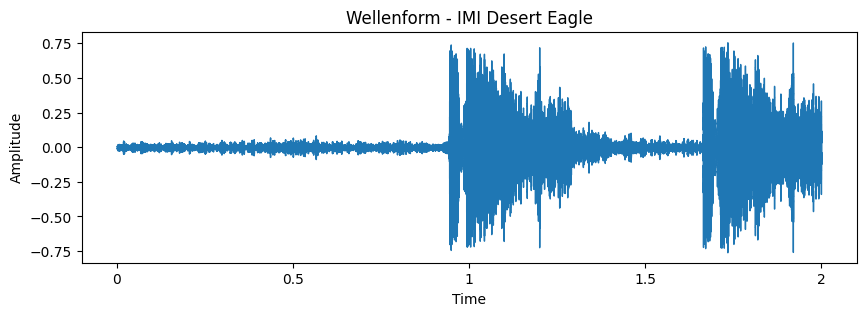

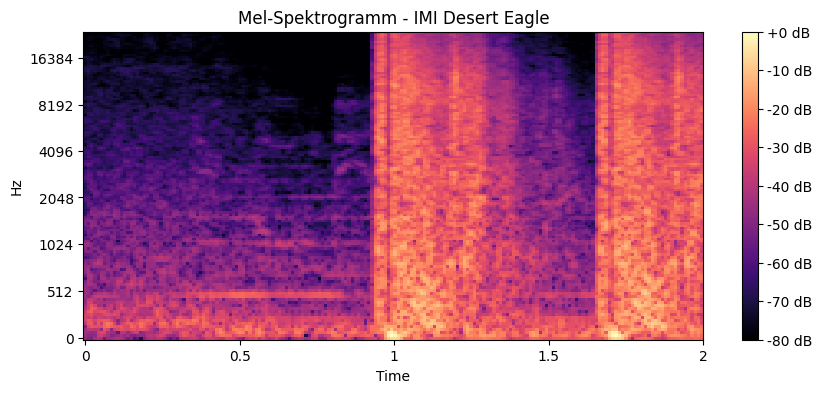

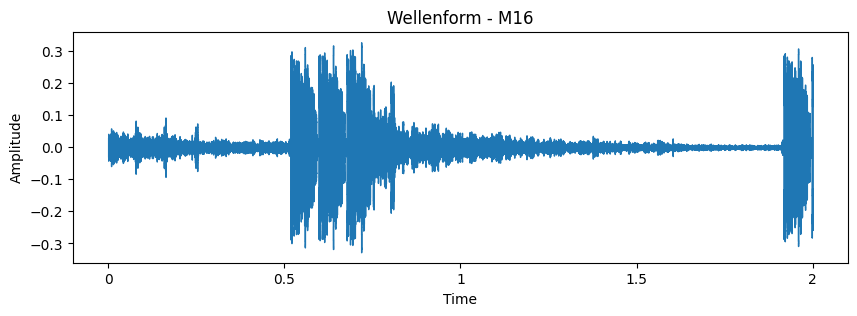

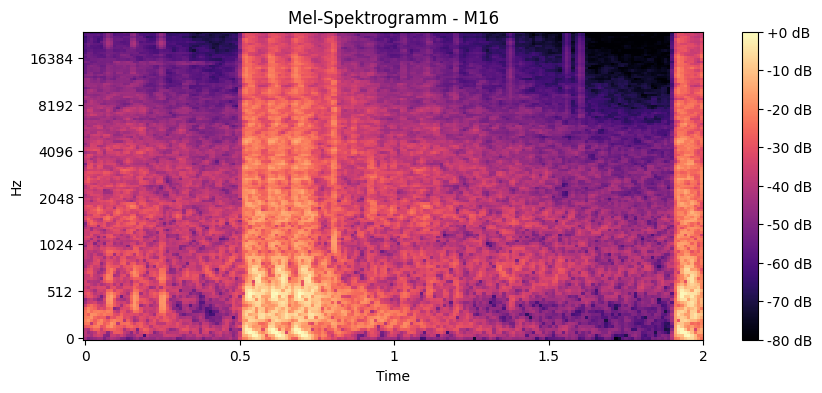

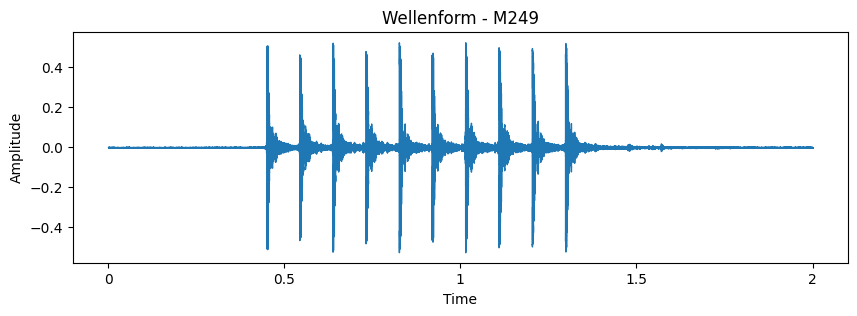

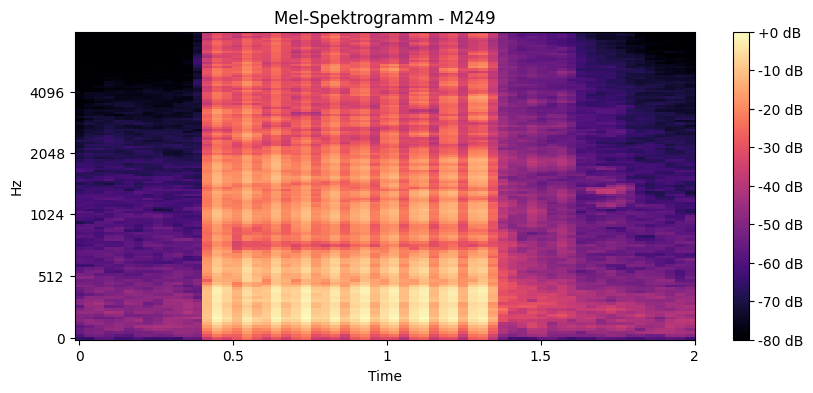

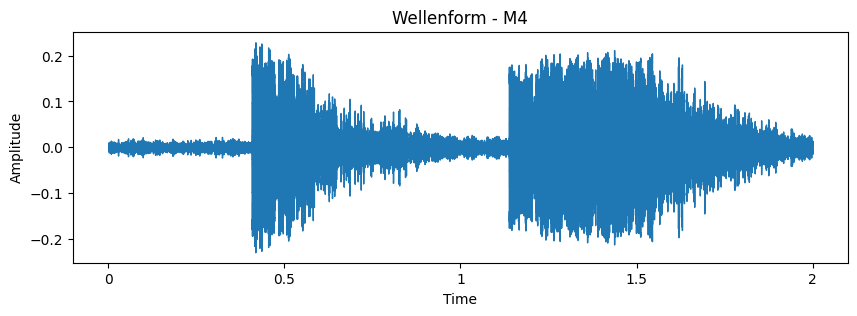

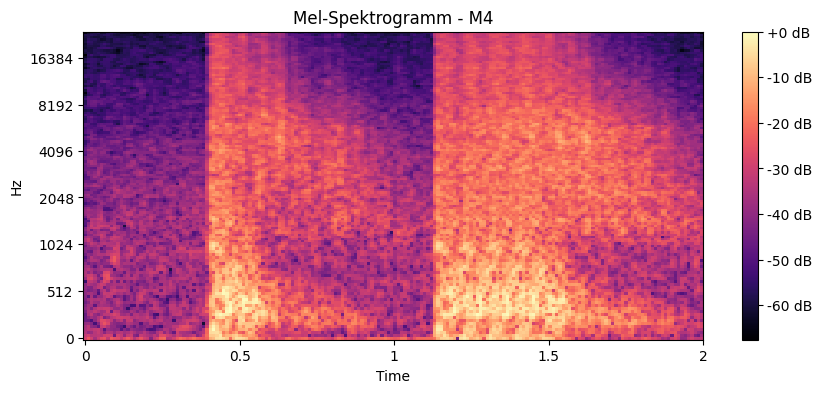

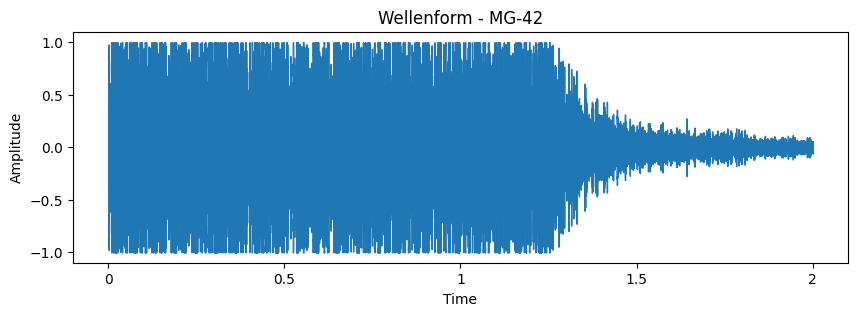

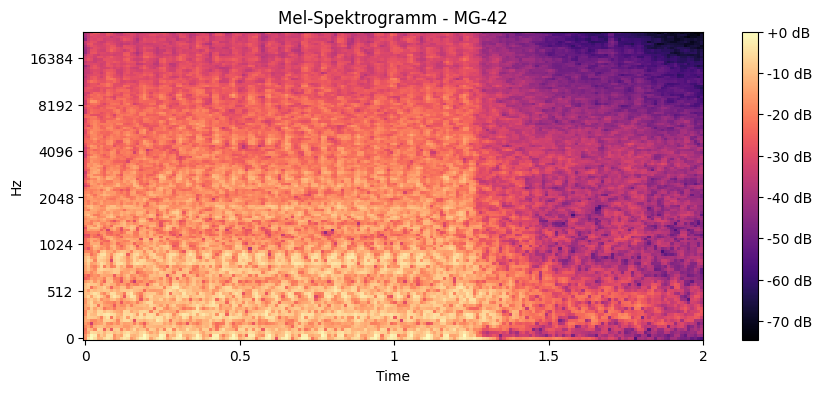

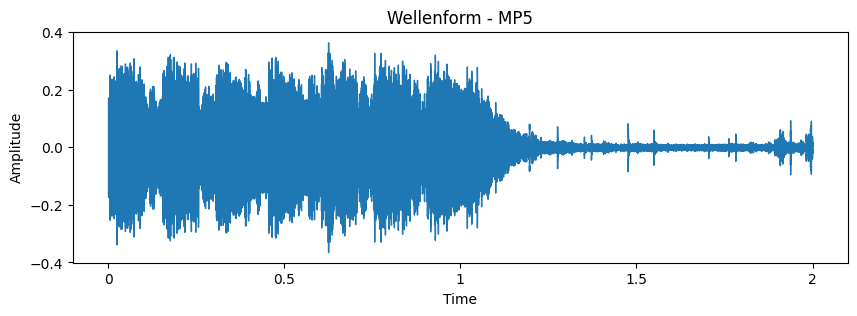

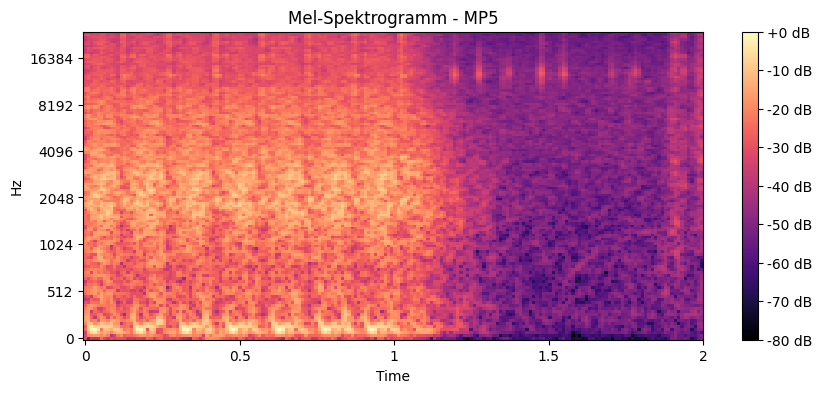

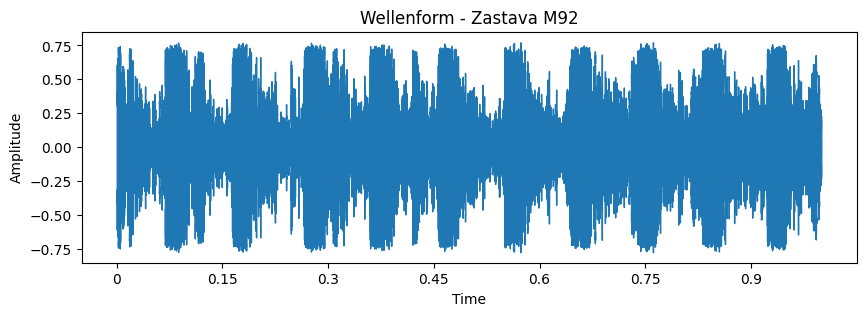

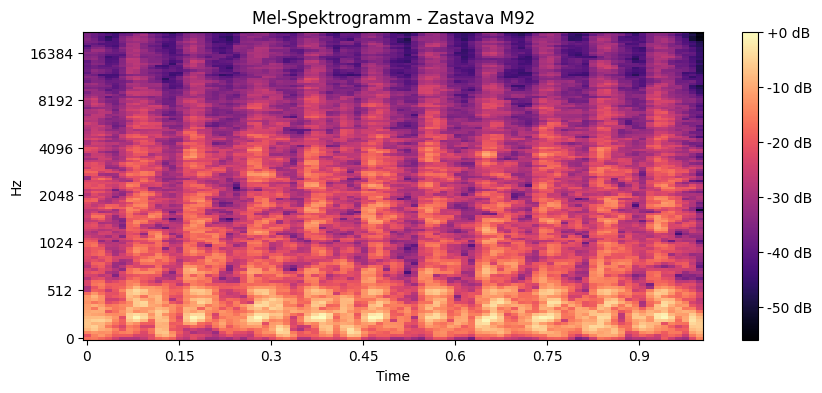

In [108]:
# Erstellung einer Funktion zum Plotten von Wellenform und Mel-Spektrogramm
def plot_example(row):
    y, sr = librosa.load(row["filepath"], sr=None)
    
    # Wellenform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Wellenform - {row['label']}")
    plt.ylabel("Amplitude")
    plt.show()
    
    # Mel-Spektrogramm
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Mel-Spektrogramm - {row['label']}")
    plt.show()

# Beispiel: eine zufällige Datei pro Klasse plotten
for label in classes:
    example = df[df["label"] == label].sample(1).iloc[0]
    plot_example(example)


## III. Ansätze zur Modellierung

**In diesem Abschnitt werden zwei Modellierungsansätze verfolgt:** 

Im ersten Ansatz werden werden die Dateien auf eine Sekunde getrimmt. Die gewählte Sekunde orientiert sich am Peak der jeweiligen Datei. Im zweiten Ansatz werden mehrere Peaks pro Datei mit einer Länge von jeweils 60 ms zur Modellierung verwendet.

### Modellierungsansatz 1: Peak-Getrimmte Dateien (1s)

Der folgende Code implementiert einen vollständigen Prozess zum Trainieren und Auswerten eines Convolutional Neural Network (CNN) zur Klassifizierung von Spektrogramm-Bildern, die um 1s optimiert sind. 

Der Ablauf gliedert sich in vier Hauptschritte:

1. Datenvorbereitung: Aus einem bestehenden DataFrame werden die Pfade zu den Spektrogramm-Bildern und deren Labels ausgelesen. Die Bilder werden geladen, in ein numerisches Format umgewandelt und normalisiert. Die textbasierten Labels werden ebenfalls in ein numerisches Format (One-Hot-Encoding) für das Modell umgewandelt. Anschließend werden die Daten in Trainings-, Validierungs- und Test-Sets aufgeteilt.

2. Modellerstellung: Es wird ein ausbalanciertes CNN mit zwei Faltungsblöcken definiert. Techniken wie Batch Normalization zur Stabilisierung des Trainings und Dropout zur Vermeidung von Overfitting werden eingesetzt.

3. Modelltraining: Das erstellte Modell wird mit den Trainingsdaten trainiert. Während des Trainings wird die Leistung auf den Validierungsdaten überwacht. Ein EarlyStopping-Mechanismus sorgt dafür, dass das Training automatisch beendet wird, sobald sich die Leistung nicht mehr verbessert, um das bestmögliche Modell zu speichern.

4. Auswertung: Nach dem Training wird die Leistung des finalen Modells auf den unberührten Testdaten bewertet. Die Ergebnisse werden auf verschiedene Weisen visualisiert und analysiert: durch das Plotten der Lernkurven, die Ausgabe eines detaillierten Klassifikationsberichts und die Darstellung einer Konfusionsmatrix.

5. Modelltuning: Zur Leistungssteigerung wird das Modell u.a. durch Daten-Augmentation, Transfer Learning, stärkere Regularisierung sowie eine reduzierte Lernrate gezielt stabilisiert und optimiert.

#### Preprocessing

Die Spektrogramm-Bilder der zentrierten Peak-Momente um eine Sekunde werden in diesem Preprocessing Schritt in einem Ordner und als DataFrame gespeichert.

Verarbeite 1056 Audio-Dateien und speichere Spektrogramm-Bilder...


Processing files:   0%|          | 0/1056 [00:00<?, ?it/s]


=== DATASET ERSTELLT ===
Gespeicherte Bilder: 1056
Bilder-Verzeichnis: C:\Users\nicol\OneDrive\#HP\Dokumente\Gunshot-CNN-Model\melspectogram_1s_peak\spectrogram_images
Dataset CSV: C:\Users\nicol\OneDrive\#HP\Dokumente\Gunshot-CNN-Model\melspectogram_1s_peak\cnn_dataset.csv

Klassenverteilung:
label
M249                201
AK-47               175
IMI Desert Eagle    100
M16                 100
M4                  100
MG-42               100
MP5                 100
AK-12                98
Zastava M92          82
Name: count, dtype: int64

=== AK-12 ===


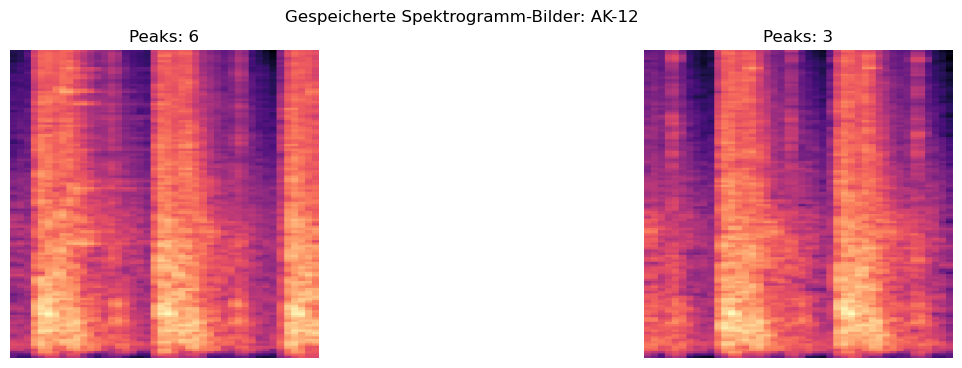


=== AK-47 ===


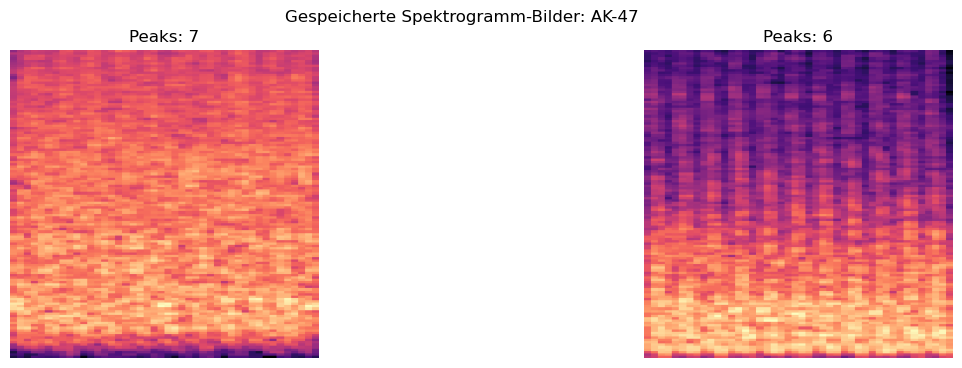


=== IMI Desert Eagle ===


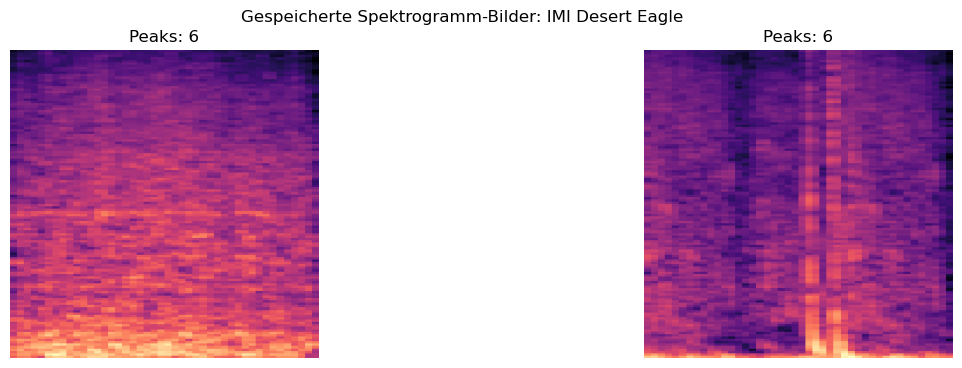


=== M16 ===


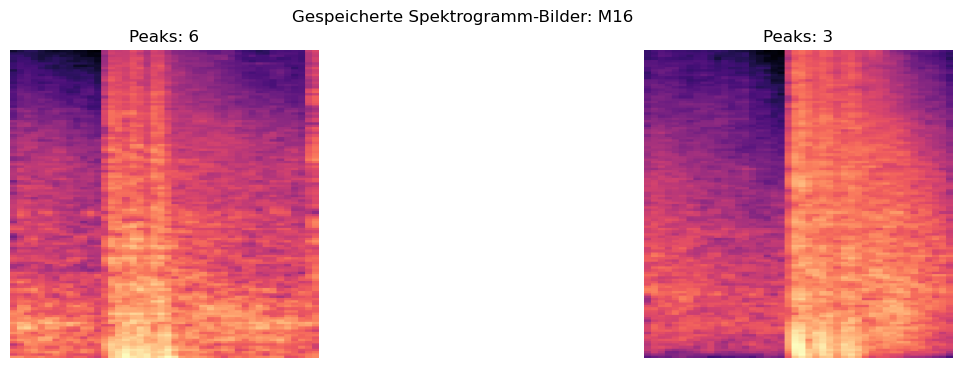


=== M249 ===


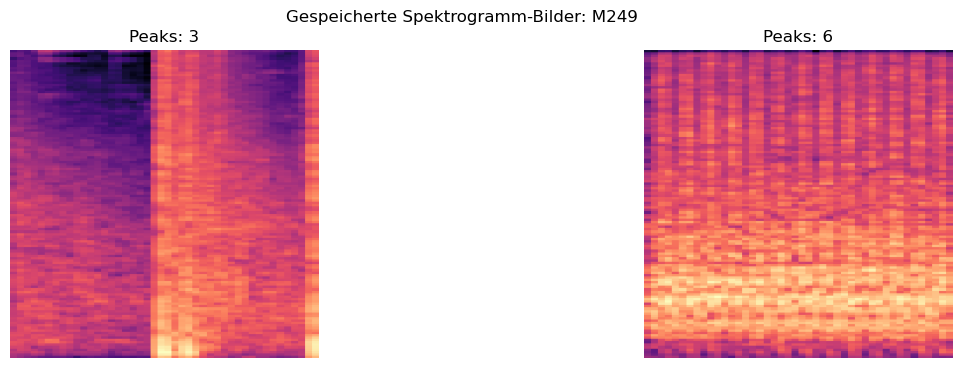


=== M4 ===


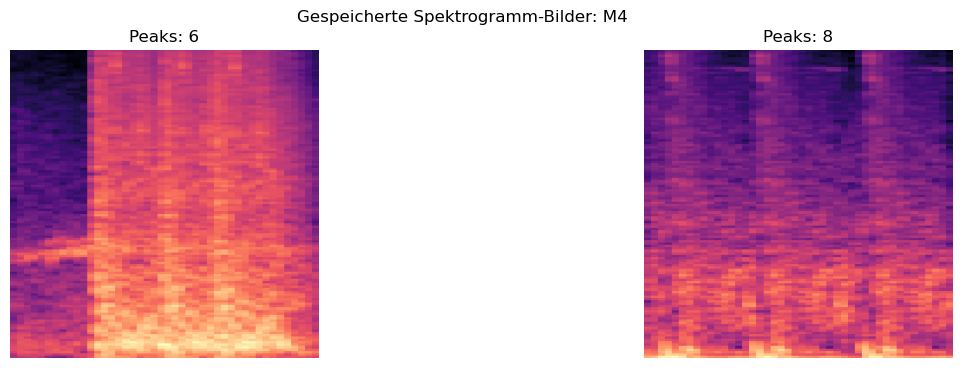


=== MG-42 ===


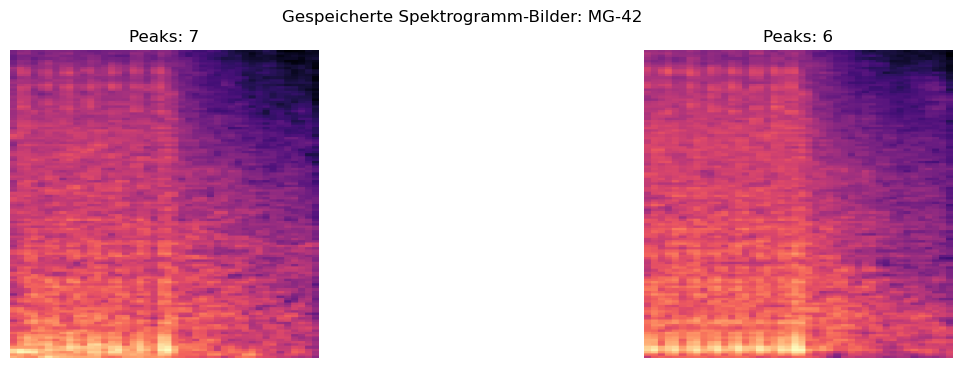


=== MP5 ===


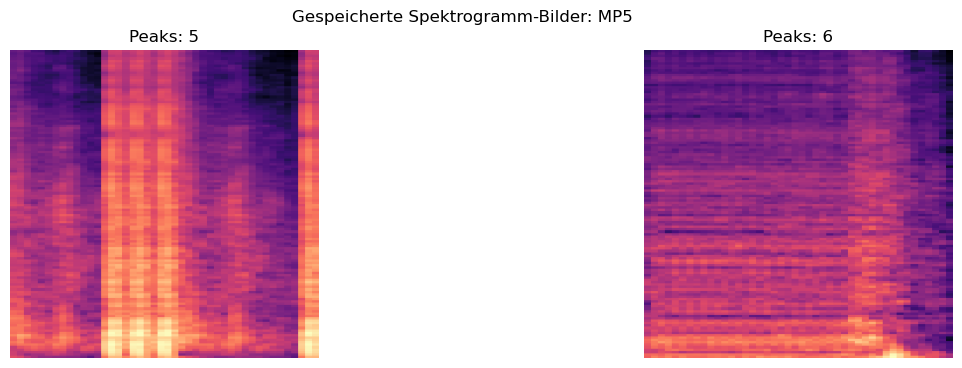


=== Zastava M92 ===


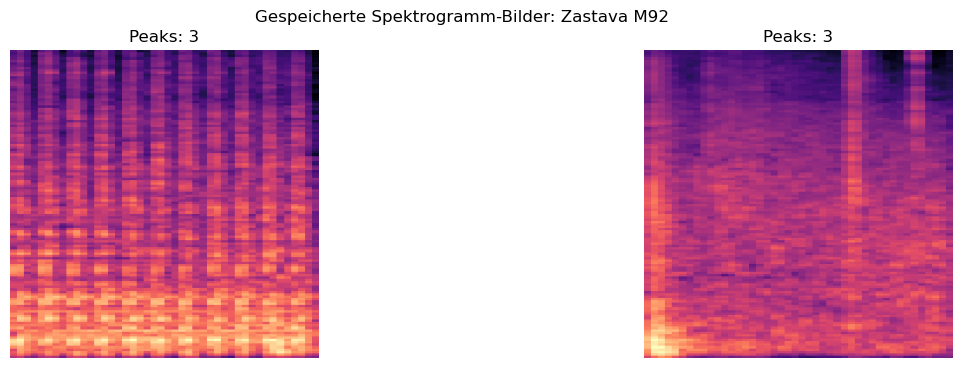


Dataset für CNN-Training bereit!
Spalten im DataFrame:
['image_path', 'label', 'original_filepath', 'original_filename', 'peak_time', 'extract_start', 'extract_duration', 'peak_count', 'original_duration', 'sample_rate', 'label_id']


In [ ]:
def find_peak_and_extract_1s(y, sr, duration=1.0, strategy="flexible"):
    """
    Findet den Peak und extrahiert 1 Sekunde optimal positioniert.
    """
    min_samples = int(duration * sr)
    if len(y) < min_samples:
        y_padded = np.zeros(min_samples, dtype=np.float32)
        y_padded[:len(y)] = y
        return y_padded, 0.0, 0.0
        
    hop_length = 128
    frame_length = 512
    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)
    
    peak_frame_idx = np.argmax(rms)
    peak_time = times[peak_frame_idx]
    peak_sample_idx = int(peak_time * sr)
    
    samples_needed = int(duration * sr)
    
    if strategy == "flexible":
        half_duration = samples_needed // 2
        ideal_start = peak_sample_idx - half_duration
        
        if ideal_start < 0:
            start_idx = 0
        elif ideal_start + samples_needed > len(y):
            start_idx = len(y) - samples_needed
        else:
            start_idx = ideal_start
            
    else:  # strategy == "strict"
        start_idx = peak_sample_idx
        if start_idx + samples_needed > len(y):
            start_idx = max(0, len(y) - samples_needed)
    
    y_extracted = y[start_idx : start_idx + samples_needed]
    extract_start_time = start_idx / sr
    
    return y_extracted, peak_time, extract_start_time

# neue Funktion zum Zählen der Peak-Momente
def count_peak_moments(y, sr, prominence=0.05, distance_s=0.2):
    rms = librosa.feature.rms(y=y, frame_length=512, hop_length=128)[0]
    hop_length_s = 128 / sr
    distance_frames = int(distance_s / hop_length_s)
    
    peaks, _ = find_peaks(
        rms,
        prominence=prominence * np.max(rms),
        distance=distance_frames
    )
    return len(peaks)

# neue Funktion zum Speichern der Bilder
def create_and_save_spectrogram_image(y, sr, filepath, n_mels=128, fmax=8000):
    plt.figure(figsize=(4, 4))
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    
    librosa.display.specshow(mel_db, sr=sr, fmax=fmax, cmap="magma")
    
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return str(filepath)

def save_peak_moments_and_create_dataset(df, output_dir="gunshot_dataset", sr_target=22050):
    base_path = Path(output_dir)
    images_dir = base_path / "spectrogram_images"
    images_dir.mkdir(parents=True, exist_ok=True)
    
    for label in df['label'].unique():
        (images_dir / label).mkdir(exist_ok=True)
    
    dataset_rows = []
    
    print(f"Verarbeite {len(df)} Audio-Dateien und speichere Spektrogramm-Bilder...")
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing files"):
        filepath = row['filepath']
        label = row['label']
        original_filename = Path(filepath).stem
        
        try:
            y, sr = librosa.load(filepath, sr=sr_target, mono=True)
            
            y_peak, peak_time, extract_start = find_peak_and_extract_1s(
                y, sr, duration=1.0, strategy="flexible"
            )
            
            # hier verwenden wir die neue Funktion
            peak_count = count_peak_moments(y, sr)
            
            image_filename = f"{original_filename}_peak_{idx:04d}.png"
            image_path = images_dir / label / image_filename
            
            saved_image_path = create_and_save_spectrogram_image(
                y_peak, sr, image_path, n_mels=128, fmax=8000
            )
            
            dataset_rows.append({
                'image_path': saved_image_path,
                'label': label,
                'original_filepath': filepath,
                'original_filename': original_filename,
                'peak_time': peak_time,
                'extract_start': extract_start,
                'extract_duration': 1.0,
                'peak_count': peak_count,
                'original_duration': len(y) / sr,
                'sample_rate': sr
            })
            
        except Exception as e:
            print(f"Fehler bei {filepath}: {e}")
            continue
            
    cnn_df = pd.DataFrame(dataset_rows)
    
    if not cnn_df.empty:
        unique_labels = sorted(cnn_df['label'].unique())
        label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
        cnn_df['label_id'] = cnn_df['label'].map(label_to_id)
        
        csv_path = base_path / "cnn_dataset.csv"
        cnn_df.to_csv(csv_path, index=False)
        
        print("\n=== DATASET ERSTELLT ===")
        print(f"Gespeicherte Bilder: {len(cnn_df)}")
        print(f"Bilder-Verzeichnis: {images_dir.resolve()}")
        print(f"Dataset CSV: {csv_path.resolve()}")
        print("\nKlassenverteilung:")
        print(cnn_df['label'].value_counts())
    
    else:
        print("Keine Dateien erfolgreich verarbeitet!")
        cnn_df = pd.DataFrame()
        
    return cnn_df

def quick_visualize_saved_images(cnn_df, samples_per_class=3):
    if cnn_df.empty:
        print("DataFrame ist leer, keine Bilder zum Anzeigen.")
        return
        
    for label in cnn_df['label'].unique():
        class_samples = cnn_df[cnn_df['label'] == label].sample(min(samples_per_class, len(cnn_df[cnn_df['label'] == label])))
        
        if class_samples.empty:
            continue
            
        print(f"\n=== {label} ===")
        fig, axes = plt.subplots(1, len(class_samples), figsize=(15, 4))
        if len(class_samples) == 1:
            axes = [axes]
        
        for i, (_, row) in enumerate(class_samples.iterrows()):
            img = plt.imread(row['image_path'])
            axes[i].imshow(img)
            axes[i].set_title(f"Peaks: {row['peak_count']}")
            axes[i].axis('off')
            
        plt.suptitle(f"Gespeicherte Spektrogramm-Bilder: {label}")
        plt.show()

# Funktion anwenden und df kreieren
cnn_dataset_1s = save_peak_moments_and_create_dataset(df, output_dir="melspectogram_1s_peak")

if not cnn_dataset_1s.empty:
     quick_visualize_saved_images(cnn_dataset_1s, samples_per_class=2)
     print("\nDataset für CNN-Training bereit!")
     print("Spalten im DataFrame:")
     print(cnn_dataset_1s.columns.tolist())

### Modelltraining

#### Modelltuning I: Transfer Learning

In diesem Code-Abschnitt wird die Methode des Transfer Learnings implementiert, um die Klassifizierungsleistung zu verbessern. Zuerst wird das auf dem ImageNet-Datensatz vortrainierte EfficientNetB0-Modell als Merkmalsextraktor geladen. Dessen gelernte Gewichte werden "eingefroren", um das bereits vorhandene, allgemeine Bilderkennungswissen zu konservieren.

Auf dieses Basismodell wird ein neuer eigener Klassifizierungs-Teil ("Kopf") aufgesetzt, der spezifisch für die Unterscheidung der neun Waffenklassen trainiert wird. Nach der Kompilierung des Gesamtmodells folgt der Trainingsprozess, der durch EarlyStopping überwacht wird, um Overfitting zu vermeiden.

Abschließend wird die Leistung des finalen trainierten Modells ausgewertet. Dies geschieht durch die Visualisierung der Lernkurven sowie die Erstellung eines detaillierten Klassifizierungsreports und einer Konfusionsmatrix, um die Stärken und Schwächen des Modells zu analysieren.

#### Modelltuning II: Zweistufiges Fine-Tuning

Der folgende Code implementiert die finale, professionelle Lösung, die diese beiden Probleme behebt. Um den MemoryError zu lösen, wird ein CustomDataGenerator eingeführt, der die Bilder speichereffizient in kleinen Portionen, Batches, von der Festplatte lädt. Entscheidend ist, dass innerhalb dieses Generators nun die korrekte preprocess_input-Funktion von EfficientNetB0 angewendet wird, um die "Sprachbarriere" zu überwinden und volle Kompatibilität zu gewährleisten. Das Training erfolgt in einem zweistufigen Fine-Tuning-Prozess: Zuerst wird nur der neue Klassifizierungs-Kopf trainiert, danach wird das gesamte Modell mit einer sehr niedrigen Lernrate feinjustiert, um maximale Leistung zu erzielen.


--- PHASE 1: Training des Klassifizierungs-Kopfes ---
Epoch 1/25
22/22 [==============================] - 51s 2s/step - loss: 2.1423 - accuracy: 0.1970 - val_loss: 1.9992 - val_accuracy: 0.1893
Epoch 2/25
22/22 [==============================] - 31s 1s/step - loss: 1.9363 - accuracy: 0.2681 - val_loss: 1.9002 - val_accuracy: 0.3669
Epoch 3/25
22/22 [==============================] - 32s 1s/step - loss: 1.7751 - accuracy: 0.3570 - val_loss: 1.8047 - val_accuracy: 0.3550
Epoch 4/25
22/22 [==============================] - 33s 2s/step - loss: 1.7717 - accuracy: 0.3511 - val_loss: 1.7748 - val_accuracy: 0.3905
Epoch 5/25
22/22 [==============================] - 30s 1s/step - loss: 1.6528 - accuracy: 0.4044 - val_loss: 1.7091 - val_accuracy: 0.3964
Epoch 6/25
22/22 [==============================] - 30s 1s/step - loss: 1.6372 - accuracy: 0.4178 - val_loss: 1.7160 - val_accuracy: 0.3964
Epoch 7/25
22/22 [==============================] - 30s 1s/step - loss: 1.5994 - accuracy: 0.4207 - val_l

C:\Users\nadiguezel\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nadiguezel\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\nadiguezel\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

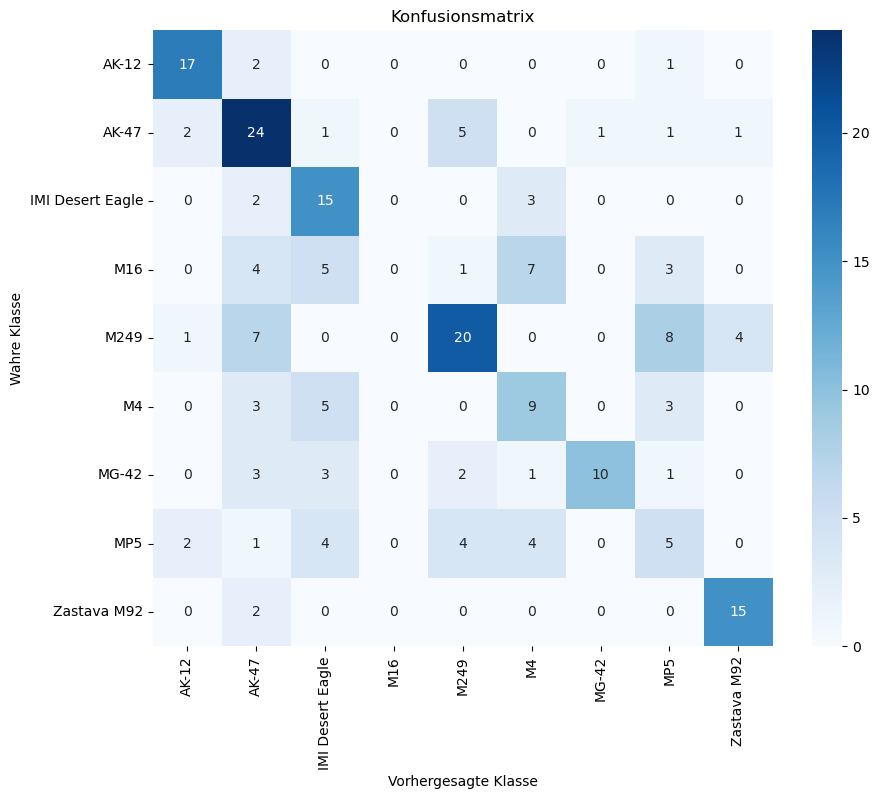

In [ ]:
#Custom Data Generator 
class CustomDataGenerator(Sequence):
    def __init__(self, df, batch_size, target_size, num_classes, shuffle=True):
        self.df = df
        self.batch_size = batch_size
        self.target_size = target_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.le = LabelEncoder().fit(cnn_dataset_1s['label'])
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size)

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        batch_df = self.df.iloc[start_index:end_index]
        X, y = self.__data_generation(batch_df)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __data_generation(self, batch_df):
        X_batch = []
        for filepath in batch_df['image_path']:
            img = load_img(filepath, target_size=self.target_size)
            img = img_to_array(img)
            X_batch.append(img)
        labels_encoded = self.le.transform(batch_df['label'])
        y_batch = to_categorical(labels_encoded, num_classes=self.num_classes)
        # Preprocessing erst NACH Augmentation anwenden
        return np.array(X_batch), np.array(y_batch)

# Datenvorbereitung
batch_size = 32
num_classes = cnn_dataset_1s['label'].nunique()
class_names = sorted(cnn_dataset_1s['label'].unique())

train_val_df, test_df = train_test_split(cnn_dataset_1s, test_size=0.2, stratify=cnn_dataset_1s['label'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df['label'], random_state=42)

train_generator = CustomDataGenerator(train_df, batch_size, img_shape_keras, num_classes)
val_generator = CustomDataGenerator(val_df, batch_size, img_shape_keras, num_classes)
test_generator = CustomDataGenerator(test_df, batch_size, img_shape_keras, num_classes, shuffle=False)


# Modell aufbauen mit Augmentation und Preprocessing als Layer
inputs = Input(shape=img_shape_keras)
# Data Augmentation anwenden
x = RandomZoom(0.1)(inputs)
# korrektes Preprocessing als Teil des Modells
x = preprocess_input(x)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape_keras)
base_model.trainable = False
x = base_model(x, training=False) # !Wichtig!: training=False im Inferenzmodus

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)

# Phase 1 des Trainings: nur den neuen Kopf trainieren 
print("\n--- PHASE 1: Training des Klassifizierungs-Kopfes ---")
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_head = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[early_stopping],
    verbose=1
)

# Phase 2 des Trainings: Fine-Tuning 
print("\n--- PHASE 2: Fine-Tuning des gesamten Modells ---")
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 30 # etwas mehr Layer auftauen
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
model.compile(optimizer=Adam(learning_rate=1e-5), # sehr niedrige Lernrate
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# Anzahl der gesamten Epochen angeben
total_epochs = len(history_head.history['loss']) + 25 

history_fine_tune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=len(history_head.history['loss']), # hier starten, wo Phase 1 endete
    callbacks=[early_stopping],
    verbose=1
)

# Auswertung
print("\n--- Finale Auswertung auf dem Test-Set ---")
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Verlust auf Testdaten: {test_loss:.4f}")
print(f"Genauigkeit auf Testdaten: {test_accuracy:.4f}")

y_pred_probs = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
le_final = LabelEncoder().fit(cnn_dataset_1s['label'])
y_true_classes = le_final.transform(test_df['label'])

print("\n--- Klassifizierungs-Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Konfusionsmatrix'); plt.ylabel('Wahre Klasse'); plt.xlabel('Vorhergesagte Klasse')
plt.show()

Der letzte Trainingsdurchlauf war ein entscheidender Erfolg. Das Modell hat den Modalkollaps überwunden und eine solide Testgenauigkeit von ~54 % erreicht. Dies zeigt, dass der Transfer-Learning-Ansatz mit korrektem Fine-Tuning funktioniert. Die Analyse legt dar, dass Klassen wie AK-12 und Zastava M92 bereits sehr gut erkannt werden. Gleichzeitig wurden klare Schwachstellen aufgedeckt: Die Klasse M16 wurde gar nicht gelernt und andere Klassen wie MP5 und M4 zeigen eine schwache Leistung.

#### Zusammenfassung des bisherigen Fortschritts

Nach einer intensiven Phase des Experimentierens und der Fehlerbehebung hat sich der Ansatz des Transfer Learnings ohne Daten-Augmentierung als die bisher erfolgreichste Methode erwiesen. Durch die Verwendung von Spektrogrammen, die auf einen 1-sekündigen Ausschnitt um den energiereichsten Peak des Audiosignals zentriert waren, konnte ein stabiles und lernfähiges Modell entwickelt werden. Dieses Modell erzielt im besten Durchlauf eine Testgenauigkeit von circa 54%. Damit wurde eine solide Baseline geschaffen und bewiesen, dass die grundlegende Problemstellung lösbar ist, auch wenn einige Klassen wie die M16 noch Schwächen in der Erkennung zeigen.

**Nächster Schritt: Analyse eines 60ms Peak-Moments**

Die Hypothese für den nächsten Schritt ist, dass der eigentliche, charakteristische "Knall" eines Schusses in einem noch kürzeren Zeitfenster stattfindet. Eine ganze Sekunde könnte bereits zu viel Nachhall oder Umgebungsgeräusche enthalten, die das Signal verwässern und die Unterscheidung ähnlicher Waffen erschweren.

Daher wird im folgenden Modellierungsansatz der zu analysierende Audioausschnitt auf 60 Millisekunden reduziert, der weiterhin um den energiereichsten Peak zentriert ist. Ziel ist es herauszufinden, ob diese stärkere Fokussierung auf den reinen Schussimpuls dem Modell hilft, die feinen Unterscheidungsmerkmale der Klassen noch präziser zu lernen und die Klassifizierungsgenauigkeit weiter zu verbessern.

### Modellierungsansatz 2: Peak-Getrimmte Dateien (60ms)

Da in den vorherigen Modellen die geringe Datenlage einer der Gründe für die vergleichsweise schwache Accuracy war, versucht dieser Ansatz nicht lediglich den größten Peak aus jeder Datei zu extrahieren, sondern auch mehrere Peaks aus einer Datei zu nutzen, falls eine Waffe mehrfach betätigt wurde. Mit diesem Ansatz kann die Datenlage verbessert werden ohne eine weitere Datenquelle hinzufügen zu müssen. Zudem werden die Dateien nicht mehr auf eine Sekunde reduziert, sondern auf 60ms (10ms vor Peak und 50 ms nach dem Peak). Das entspricht der Länge, die in vergleichbaren Studien als größtmögliche Länge der Frames verwendet wurde. Einige Studien fokussieren sich lediglich auf den Mündungsknall mit einer Länge von 6 - 10,7ms ([Paraskevas & Rangoussi, 2012](https://pdfs.semanticscholar.org/6c31/a3b3fa063e7b10686353b898e9f955057d70.pdf); [Sánchez-Hevia et al., 2017](https://ieeexplore.ieee.org/document/7933058)) während andere auch Reflexionen und Echos mit einer Länge von 20 - 63ms berücksichtigen ([Raponi et al., 2020](https://arxiv.org/abs/2004.07948); [Ellen & Linnea, 2022](https://lup.lub.lu.se/luur/download?func=downloadFile&recordOId=9090317&fileOId=9090321)).

#### Preprocessing a

Die folgenden Parameter zur Peak-Erkennnung und -Extraktion finden in dem Code Berücksichtigung:

* window_ms – Größe des RMS-Fensters in Millisekunden (Standard 5 ms) → Bestimmt, wie „glatt“ die Energiekurve ist.

* threshold_factor – Multiplikator für den RMS-Median (Standard 3) → Ein Peak muss z. B. 3× lauter als der Median sein, um erkannt zu werden.

* pre_peak_ms – Zeit vor dem Peak (Standard 10 ms) → Start des extrahierten Segments.

* post_peak_ms – Zeit nach dem Peak (Standard 50 ms) → Ende des Segments.

* total_extract_samples – Gesamtlänge des Segments (pre + post = 60)

* min_distance_ms – Mindestabstand zwischen Peaks (Standard 40 ms) → Verhindert, dass Peaks zu dicht aufeinander doppelt gezählt werden. 40 ms entspricht dem schnellstmöglichen Abstand von Schüssen

* prominence – relative Signifikanz eines Peaks (0.1 × max RMS) → Filtert nur deutlich erkennbare Peaks.

* Überlappungsprüfung (used_regions) → Überschneidende Segmente werden verworfen, nur ein Segment bleibt.

* Fallback-Regel → Falls kein Peak gefunden wird: trotzdem 1 Segment (60 ms) erzeugen, ggf. gepaddet.

* sr_target – Ziel-Samplerate der Audios (z. B. 22.050 Hz)

* max_peaks_per_file – Max. Anzahl der Segmente pro Datei (Standard 15)

* class_specific_thresholds – Optional: bestimmte Klassen bekommen eigenen threshold_factor → z. B. MG-42 niedriger, M249 höher → erkennt Peaks besser je nach Waffentyp.

Verarbeite 1056 Audio-Dateien und extrahiere mehrere Peaks pro Datei...


Processing files:   0%|          | 0/1056 [00:00<?, ?it/s]

C:\Users\nadiguezel\anaconda3\envs\tf_env\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1322
  warnings.warn(



=== DATASET ERSTELLT ===
Gespeicherte Segmente: 7843 (aus 7843 Peaks)
Bilder-Verzeichnis: C:\Users\nadiguezel\OneDrive - freenet Group\Dokumente\GitHub\Gunshot-CNN-Model\melspectogram_60ms_peak\spectrogram_images
Dataset CSV: C:\Users\nadiguezel\OneDrive - freenet Group\Dokumente\GitHub\Gunshot-CNN-Model\melspectogram_60ms_peak\cnn_dataset_multi_peaks.csv
Durchschnittlich 7.4 Peaks pro Original-Datei

Klassenverteilung:
label
M249                1494
AK-47               1146
MP5                  851
AK-12                843
M16                  808
M4                   808
IMI Desert Eagle     703
MG-42                644
Zastava M92          546
Name: count, dtype: int64

Peak-Statistiken pro Datei:
Min Peaks pro Datei: 1
Max Peaks pro Datei: 15
Durchschnitt Peaks pro Datei: 7.4

=== AK-12 ===


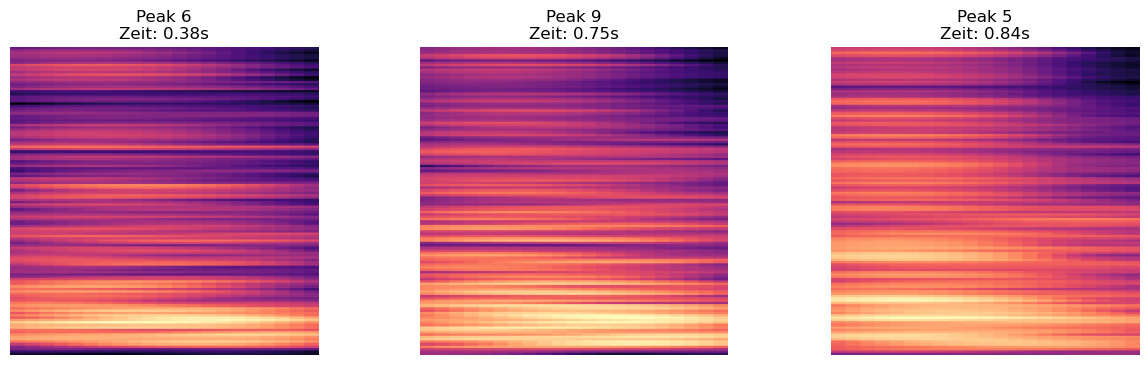


=== AK-47 ===


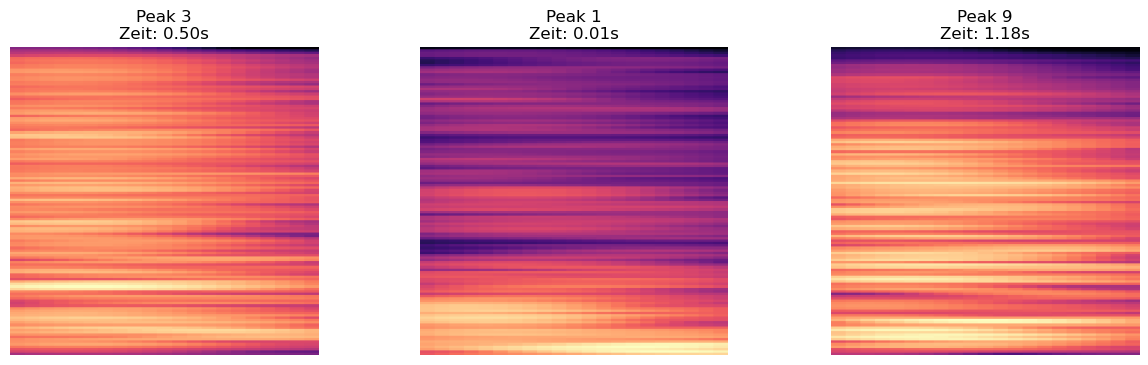


=== IMI Desert Eagle ===


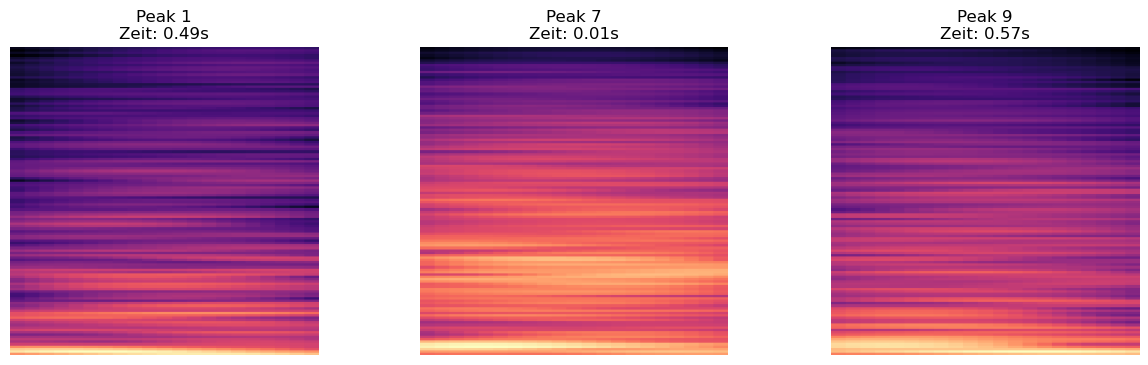


=== M16 ===


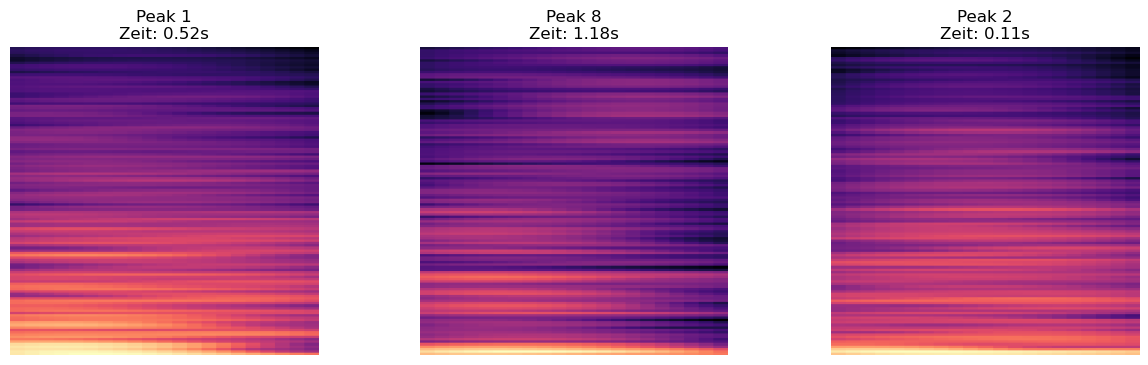


=== M249 ===


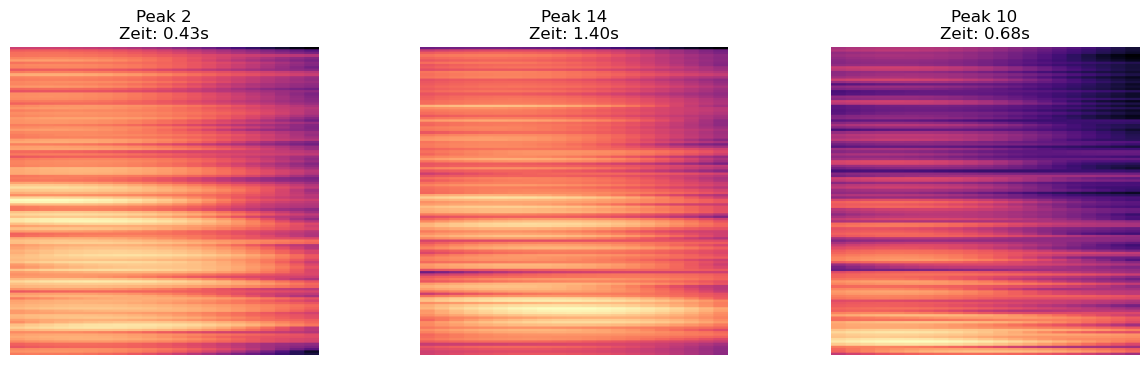


=== M4 ===


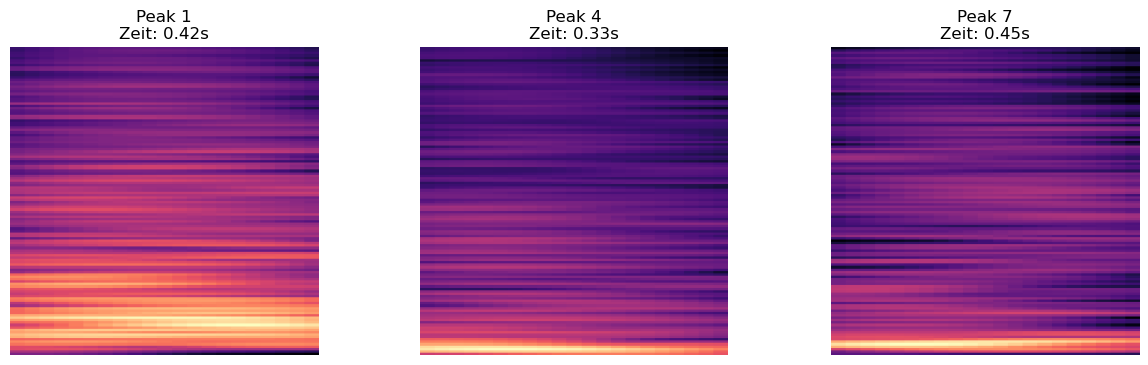


=== MG-42 ===


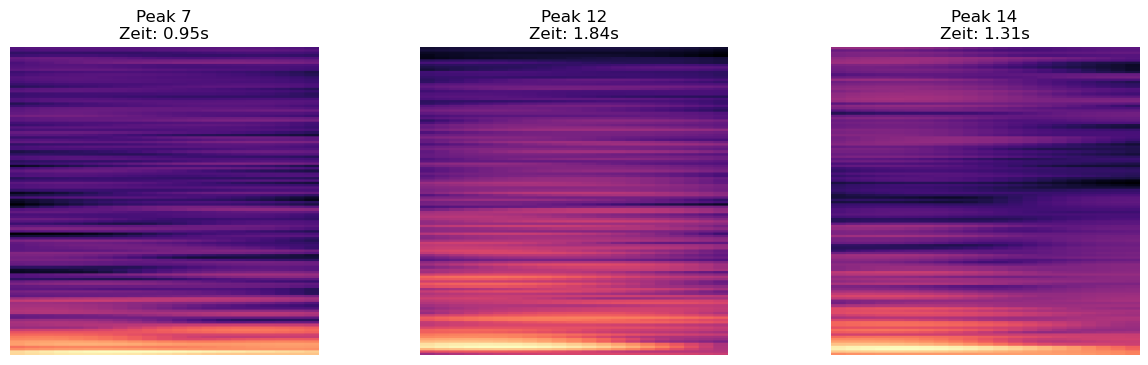


=== MP5 ===


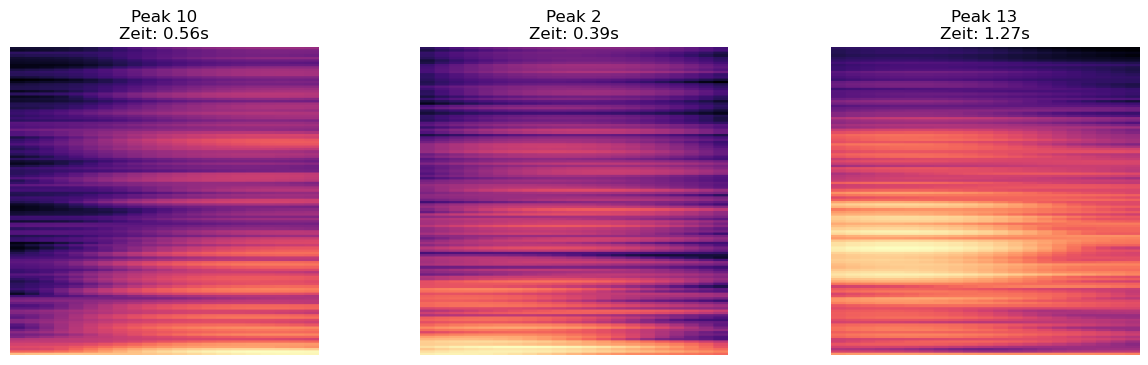


=== Zastava M92 ===


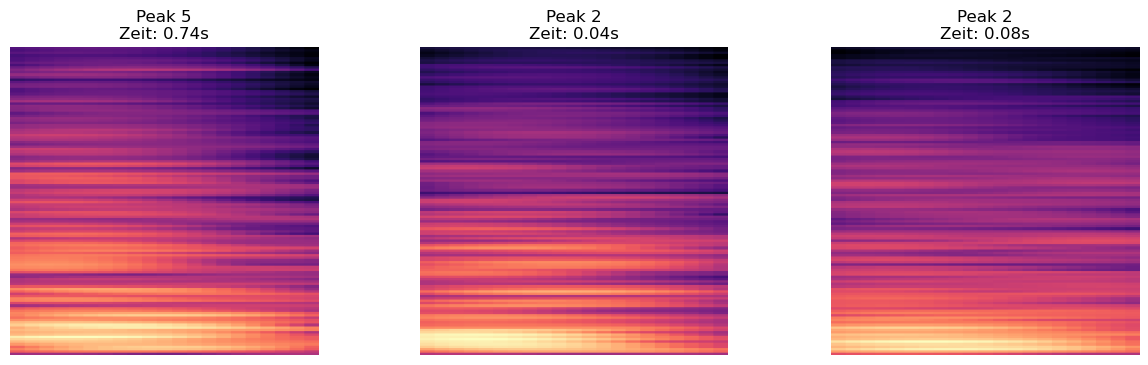


Dataset für CNN-Training bereit!
Spalten im DataFrame:
['image_path', 'label', 'original_filepath', 'original_filename', 'peak_time', 'extract_start', 'extract_duration', 'segment_index', 'total_peaks_in_file', 'extracted_peaks_count', 'original_duration', 'sample_rate', 'label_id']


In [3]:
def find_multiple_peaks_and_extract_60ms(
    y, sr, 
    window_ms=2, 
    threshold_factor=3, 
    pre_peak_ms=10, 
    post_peak_ms=50, 
    min_distance_ms=40
):
    """
    Findet mehrere Peaks basierend auf RMS-Energie und extrahiert 60ms Segmente
    (10ms vor Peak + 50ms nach Peak).
    
    Parameters:
    - y: Audio-Signal
    - sr: Sample-Rate
    - window_ms: Fenstergröße für RMS-Berechnung in ms
    - threshold_factor: Multiplikator für RMS-Threshold (z.B. 7× RMS)
    - pre_peak_ms: Zeit vor Peak in ms
    - post_peak_ms: Zeit nach Peak in ms  
    - min_distance_ms: Mindestabstand zwischen Peaks in ms
    
    Returns:
    - List von (y_extracted, peak_time, extract_start_time) Tupeln
    """

    # Parameter in Samples
    window_samples = int(window_ms * sr / 1000)
    pre_peak_samples = int(pre_peak_ms * sr / 1000)
    post_peak_samples = int(post_peak_ms * sr / 1000)
    total_extract_samples = pre_peak_samples + post_peak_samples
    min_distance_samples = int(min_distance_ms * sr / 1000)

    # RMS-Energie berechnen
    hop_length = max(1, window_samples // 2)
    frame_length = max(window_samples, 2)
    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)

    # robusterer Threshold (Median statt Mittelwert)
    rms_median = np.median(rms)
    threshold = threshold_factor * rms_median

    # Peaks finden
    min_distance_frames = max(1, min_distance_samples // hop_length)
    peaks_frames, properties = find_peaks(
        rms,
        height=threshold,
        distance=min_distance_frames,
        prominence=0.1 * np.max(rms)  # etwas lockerer
    )

    extracted_segments = []
    used_regions = []

    # sortieren nach Peakstärke
    peak_strengths = rms[peaks_frames] if len(peaks_frames) > 0 else []
    sorted_indices = np.argsort(peak_strengths)[::-1]

    for idx in sorted_indices:
        peak_frame = peaks_frames[idx]
        peak_time = times[peak_frame]
        peak_sample = int(peak_time * sr)

        # Start/Ende anpassen statt verwerfen
        start_sample = max(0, peak_sample - pre_peak_samples)
        end_sample = start_sample + total_extract_samples
        if end_sample > len(y):
            end_sample = len(y)
            start_sample = max(0, end_sample - total_extract_samples)

        # Überlappung checken
        overlap = any(
            not (end_sample <= used_start or start_sample >= used_end)
            for used_start, used_end in used_regions
        )
        if overlap:
            continue

        # Segment extrahieren
        y_extracted = y[start_sample:end_sample]
        used_regions.append((start_sample, end_sample))
        extract_start_time = start_sample / sr
        extracted_segments.append((y_extracted, peak_time, extract_start_time))

    # Fallback: mindestens 1 Segment zurückgeben
    if len(extracted_segments) == 0:
        y_padded = np.zeros(total_extract_samples, dtype=np.float32)
        if len(y) >= total_extract_samples:
            y_padded[:] = y[:total_extract_samples]
        else:
            y_padded[:len(y)] = y  # falls Datei kürzer als 60ms ist
        extracted_segments.append((y_padded, 0.0, 0.0))

    return extracted_segments

def count_peak_moments(y, sr, prominence=0.05, distance_s=0.2):
    """
    Zählt die Anzahl signifikanter Peaks in einem Audiosignal basierend auf der RMS-Energie.
    """
    rms = librosa.feature.rms(y=y, frame_length=512, hop_length=128)[0]
    hop_length_s = 128 / sr
    distance_frames = int(distance_s / hop_length_s)
    
    peaks, _ = find_peaks(
        rms,
        prominence=prominence * np.max(rms),
        distance=distance_frames
    )
    return len(peaks)

def create_and_save_spectrogram_image(y, sr, filepath, n_mels=512, fmax=8000, hop_length=64):
    """
    Erstellt Spektrogramm-Bild aus Audio und speichert es.
    """
    plt.figure(figsize=(4, 4))
    mel = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=n_mels, fmax=fmax, hop_length=hop_length
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    
    librosa.display.specshow(mel_db, sr=sr, fmax=fmax, cmap="magma", hop_length=hop_length)
    
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return str(filepath)


def save_multiple_peaks_and_create_dataset(df, output_dir="gunshot_dataset", sr_target=22050,
                                         window_ms=2, threshold_factor=3,
                                         max_peaks_per_file=15, class_specific_thresholds=None):
    """
    Extrahiert mehrere Peaks pro Audio-Datei und erstellt ein Dataset mit 60ms Segmenten.
    """
    base_path = Path(output_dir)
    images_dir = base_path / "spectrogram_images"
    images_dir.mkdir(parents=True, exist_ok=True)
    
    for label in df['label'].unique():
        (images_dir / label).mkdir(exist_ok=True)
    
    dataset_rows = []
    total_segments = 0
    
    print(f"Verarbeite {len(df)} Audio-Dateien und extrahiere mehrere Peaks pro Datei...")
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing files"):
        filepath = row['filepath']
        file_path = Path(filepath)
        label = row['label']
        original_filename = file_path.stem
        
        try:
            y, sr = librosa.load(filepath, sr=sr_target, mono=True)
            
            # extrahiere mehrere Peak-Segmente
            peak_segments = find_multiple_peaks_and_extract_60ms(
                y, sr, 
                window_ms=window_ms, 
                threshold_factor=threshold_factor,
                pre_peak_ms=10,
                post_peak_ms=50
            )
            
            # begrenze Anzahl der Peaks pro Datei
            peak_segments = peak_segments[:max_peaks_per_file]
            
            # gesamte Peak-Anzahl für Originaldatei
            total_peak_count = count_peak_moments(y, sr)
            
            for segment_idx, (y_peak, peak_time, extract_start) in enumerate(peak_segments):
                # eindeutiger Dateiname für jedes Segment
                image_filename = f"{original_filename}_peak_{idx:04d}_{segment_idx:02d}.png"
                image_path = images_dir / label / image_filename
                
                saved_image_path = create_and_save_spectrogram_image(
                    y_peak, sr, image_path, n_mels=128, fmax=8000
                )
                
                dataset_rows.append({
                    'image_path': saved_image_path,
                    'label': label,
                    'original_filepath': filepath,
                    'original_filename': original_filename,
                    'peak_time': peak_time,
                    'extract_start': extract_start,
                    'extract_duration': 0.06,  # 60ms
                    'segment_index': segment_idx,
                    'total_peaks_in_file': total_peak_count,
                    'extracted_peaks_count': len(peak_segments),
                    'original_duration': len(y) / sr,
                    'sample_rate': sr
                })
                
                total_segments += 1
                
        except Exception as e:
            print(f"Fehler bei {filepath}: {e}")
            continue
            
    cnn_df = pd.DataFrame(dataset_rows)
    
    if not cnn_df.empty:
        unique_labels = sorted(cnn_df['label'].unique())
        label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
        cnn_df['label_id'] = cnn_df['label'].map(label_to_id)
        
        csv_path = base_path / "cnn_dataset_multi_peaks.csv"
        cnn_df.to_csv(csv_path, index=False)
        
        print("\n=== DATASET ERSTELLT ===")
        print(f"Gespeicherte Segmente: {len(cnn_df)} (aus {total_segments} Peaks)")
        print(f"Bilder-Verzeichnis: {images_dir.resolve()}")
        print(f"Dataset CSV: {csv_path.resolve()}")
        print(f"Durchschnittlich {len(cnn_df) / len(df):.1f} Peaks pro Original-Datei")
        print("\nKlassenverteilung:")
        print(cnn_df['label'].value_counts())
        
        # zusätzliche Statistiken
        print("\nPeak-Statistiken pro Datei:")
        peak_stats = cnn_df.groupby('original_filename')['segment_index'].count()
        print(f"Min Peaks pro Datei: {peak_stats.min()}")
        print(f"Max Peaks pro Datei: {peak_stats.max()}")
        print(f"Durchschnitt Peaks pro Datei: {peak_stats.mean():.1f}")
    
    else:
        print("Keine Dateien erfolgreich verarbeitet!")
        cnn_df = pd.DataFrame()
        
    return cnn_df

def quick_visualize_saved_images(cnn_df, samples_per_class=3):
    """
    Schnelle Visualisierung der gespeicherten Bilder.
    """
    if cnn_df.empty:
        print("DataFrame ist leer, keine Bilder zum Anzeigen.")
        return
        
    for label in cnn_df['label'].unique():
        class_samples = cnn_df[cnn_df['label'] == label].sample(
            min(samples_per_class, len(cnn_df[cnn_df['label'] == label]))
        )
        
        if class_samples.empty:
            continue
            
        print(f"\n=== {label} ===")
        fig, axes = plt.subplots(1, len(class_samples), figsize=(15, 4))
        if len(class_samples) == 1:
            axes = [axes]
        
        for i, (_, row) in enumerate(class_samples.iterrows()):
            img = plt.imread(row['image_path'])
            axes[i].imshow(img)
            axes[i].set_title(f"Peak {row['segment_index']+1}\n"
                            f"Zeit: {row['peak_time']:.2f}s")
            axes[i].axis('off')
        plt.show()

# klassenspezifische Thresholds definieren
class_thresholds = {
    "MG-42": 2,         # Niedrigerer Threshold für MG-42
    "Zastava M92": 2,   # Niedrigerer Threshold für Zastava M92
    "M249": 4,          # Höherer Threshold für M249 (hat schon viele Peaks)
    "AK-12": 4,         # Höherer Threshold für AK-12
    "AK-47": 4          # Höherer Threshold für AK-47
    # Andere Klassen (MP5, M16, M4, Desert Eagle) verwenden den Standard-Threshold (3)
}

# multi-Peak Extraktion mit klassenspezifischen Thresholds
cnn_dataset_60ms = save_multiple_peaks_and_create_dataset(
    df, 
    output_dir="melspectogram_60ms_peak",
    window_ms=2,
    threshold_factor=3,              # Standard-Threshold
    max_peaks_per_file=15,
    class_specific_thresholds=class_thresholds  # Klassenspezifische Thresholds
)

# Ergebnisse anzeigen
if not cnn_dataset_60ms.empty:
    quick_visualize_saved_images(cnn_dataset_60ms, samples_per_class=3)
    print("\nDataset für CNN-Training bereit!")
    print("Spalten im DataFrame:")
    print(cnn_dataset_60ms.columns.tolist())
else:
    print("Fehler: Kein Dataset erstellt. Überprüfe deine Audio-Dateien und Pfade.")

#### Modelltraining a I

Found 6279 images belonging to 9 classes.
Found 1564 images belonging to 9 classes.
Gefundene Klassen: {'AK-12': 0, 'AK-47': 1, 'IMI Desert Eagle': 2, 'M16': 3, 'M249': 4, 'M4': 5, 'MG-42': 6, 'MP5': 7, 'Zastava M92': 8}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 21, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 5, 64)        0         
 2D)                                                             
                                 

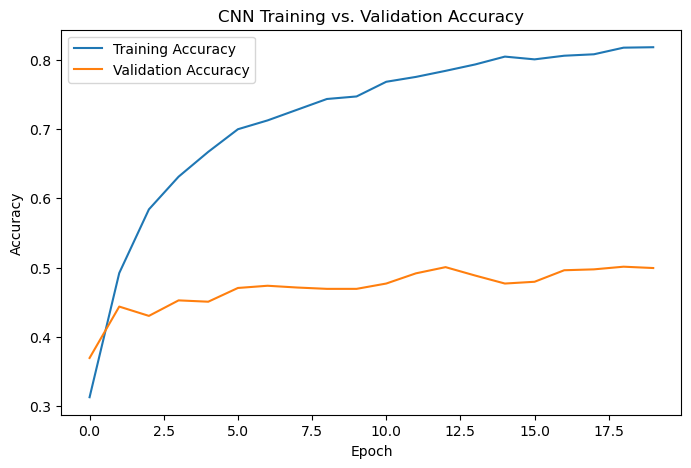

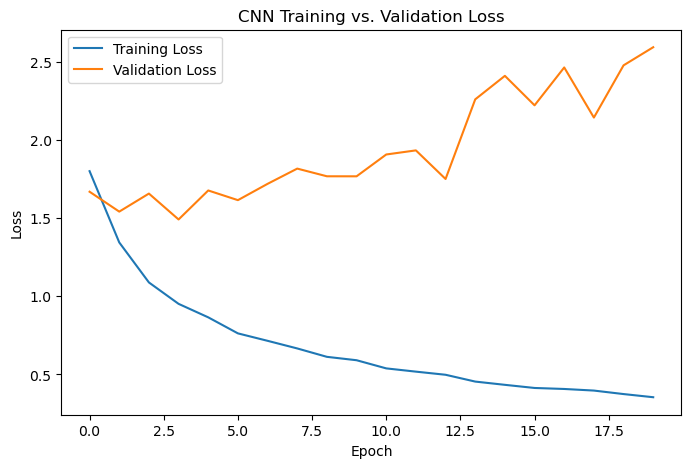

In [6]:
# Parameter festlegen
data_dir = "./melspectogram_60ms_peak/spectrogram_images"  # Pfad zu den Spectrogramm-Bildern
img_height, img_width = 128, 21    # Größe der Spektrogramme (Mel x Zeit)
batch_size = 64
epochs = 20
validation_split = 0.2              # 20% der Bilder pro Klasse für Validation

# Data Generator erstellen
# Dynamisches Laden + Rescaling + Train/Validation Split
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalisierung auf [0,1]
    validation_split=validation_split
)

# Trainingsdaten
train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),  # Bild wird auf CNN-Inputgröße angepasst
    batch_size=batch_size,
    class_mode="sparse",                  # Labels als integer (passend zu sparse_categorical_crossentropy)
    subset="training",
    shuffle=True
)

# Validierungsdaten
val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset="validation",
    shuffle=False
)

# Anzahl Klassen automatisch aus Verzeichnisstruktur
num_classes = len(train_ds.class_indices)
print("Gefundene Klassen:", train_ds.class_indices)

# CNN-Modell definieren
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # 3 Kanäle (RGB)

    # erste Feature-Extraktion
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    # zweite Feature-Extraktion
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    # dritte Feature-Extraktion (optional, kann Dropout nutzen)
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),                # Flatten für Dense Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),            # Dropout gegen Overfitting

    layers.Dense(num_classes, activation='softmax')  # Output Layer: eine Klasse pro Neuron
])


# kompilieren
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # integer Labels
    metrics=["accuracy"]
)

model.summary()

# Training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Trainingsergebnisse visualisieren
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training vs. Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training vs. Validation Loss')
plt.legend()
plt.show()

Der Graph zeigt im ersten Diagramm ein klassisches Beispiel für Overfitting. Während die Trainingsgenauigkeit weiter ansteigt, verbessert sich die Validierungsgenauigkeit nicht mehr. Die wachsende Lücke zwischen den beiden Kurven deutet darauf hin, dass das Modell beginnt, die Trainingsdaten "auswendig zu lernen", anstatt allgemeine Muster zu erkennen, die auf neue, ungesehene Daten übertragen werden können. Das Modell verliert also seine Fähigkeit zur Generalisierung.

Die zweite Grafik beschreibt die Entwicklung des Verlusts (Loss) während des Trainingsprozesses und liefert eine ergänzende Perspektive zur ersten Grafik. Während die blaue Linie den stetig sinkenden Trainingsverlust zeigt, was bedeutet, dass das Modell die Trainingsdaten immer präziser vorhersagen kann, offenbart die orangefarbene Linie ein Problem. Der Validierungsverlust sinkt zunächst ebenfalls, kehrt diesen Trend aber nach einigen Epochen um und beginnt deutlich anzusteigen.

Dies bestätigt und verschärft die Beobachtung aus der ersten Grafik: Das Modell unterliegt einer Overfitting. Es lernt nicht nur die relevanten Muster der Trainingsdaten, sondern auch deren Rauschen und spezifische Eigenheiten. Infolgedessen sinkt sein Fehler auf den Trainingsdaten weiter, während seine Fähigkeit zur Generalisierung auf neue, ungesehene Daten abnimmt, was sich im ansteigenden Verlust auf dem Validierungsdatensatz widerspiegelt. Zusammenfassend zeigen beide Diagramme, dass das Training ab etwa Epoche 10 kontraproduktiv wird, da das Modell ab diesem Punkt seine Leistung auf realen Anwendungsfällen verschlechtert.

#### Modellevaluierung a I

In [7]:
print("\nFinale Auswertung auf dem Validation-Set:")
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Verlust auf Validierungsdaten: {val_loss:.4f}")
print(f"Genauigkeit auf Validierungsdaten: {val_accuracy:.4f}")


Finale Auswertung auf dem Validation-Set:
25/25 [==============================] - 9s 354ms/step - loss: 2.5914 - accuracy: 0.4994
Verlust auf Validierungsdaten: 2.5914
Genauigkeit auf Validierungsdaten: 0.4994


Im Preprocessing wurde eine signifikante Anpassung vorgenommen: Da das Modell initial zu viele Peaks, inklusive Störgeräuschen wie Hall und Echos, extrahierte, wurde der Schwellenwert für die Peakerkennung für alle Waffenklassen auf das Siebenfache des Effektivwerts (RMS*7) angehoben.

Trotz dieser Maßnahme zur Verbesserung der Eingangsdaten sind die finalen Leistungskennzahlen unzureichend. Das Modell erreicht einen Validierungsverlust von 2.5914 und eine Validierungsgenauigkeit von lediglich 49,94 %. Diese Ergebnisse deuten stark darauf hin, dass die vorgenommene Anpassung nicht ausreichte, um das zugrunde liegende Problem der Überanpassung zu lösen. Das Modell kann nicht effektiv auf ungesehene Daten generalisieren und ist in seiner aktuellen Form nicht praxistauglich.

#### Modelltuning a I

Dieser Code implementiert den finalen und robustesten Modellierungsansatz für den 60ms-Multi-Peak-Datensatz. Um die technischen Einschränkungen vortrainierter Modelle zu umgehen, wird eine spezielle Lösung für die schmalen Spektrogrammbilder (128x21 Pixel) eingeführt.

Zuerst lädt ein ImageDataGenerator die Bilder effizient und wendet die korrekte preprocess_input-Normalisierung für das EfficientNetB0-Modell an. Das Kernstück des Modells ist eine ZeroPadding2D-Schicht, die die schmalen Bilder durch Hinzufügen schwarzer Ränder auf eine für EfficientNetB0 kompatible Breite von 32 Pixeln "auffüllt", ohne die originalen Daten zu verzerren.

Anschließend folgt ein bewährter, zweistufiger Transfer-Learning-Prozess: Zuerst wird nur der neu aufgesetzte Klassifizierungs-Kopf trainiert. Danach werden die oberen Schichten des Basis-Modells "aufgetaut" und in einer Fine-Tuning-Phase mit einer sehr niedrigen Lernrate an die spezifischen Merkmale der Spektrogramme angepasst. Abgeschlossen wird der Prozess durch eine detaillierte Auswertung der Modellleistung.

Found 6279 images belonging to 9 classes.
Found 1564 images belonging to 9 classes.
Gefundene Klassen: {'AK-12': 0, 'AK-47': 1, 'IMI Desert Eagle': 2, 'M16': 3, 'M249': 4, 'M4': 5, 'MG-42': 6, 'MP5': 7, 'Zastava M92': 8}

--- PHASE 1: Training des Klassifizierungs-Kopfes ---
Epoch 1/30
197/197 [==============================] - 77s 339ms/step - loss: 2.0083 - accuracy: 0.2594 - val_loss: 2.0339 - val_accuracy: 0.2283
Epoch 2/30
197/197 [==============================] - 54s 272ms/step - loss: 1.8579 - accuracy: 0.3110 - val_loss: 1.9826 - val_accuracy: 0.2033
Epoch 3/30
197/197 [==============================] - 53s 269ms/step - loss: 1.7817 - accuracy: 0.3329 - val_loss: 1.9619 - val_accuracy: 0.2315
Epoch 4/30
197/197 [==============================] - 49s 250ms/step - loss: 1.7316 - accuracy: 0.3448 - val_loss: 1.9504 - val_accuracy: 0.2570
Epoch 5/30
197/197 [==============================] - 50s 253ms/step - loss: 1.6985 - accuracy: 0.3657 - val_loss: 1.9178 - val_accuracy: 0.2404

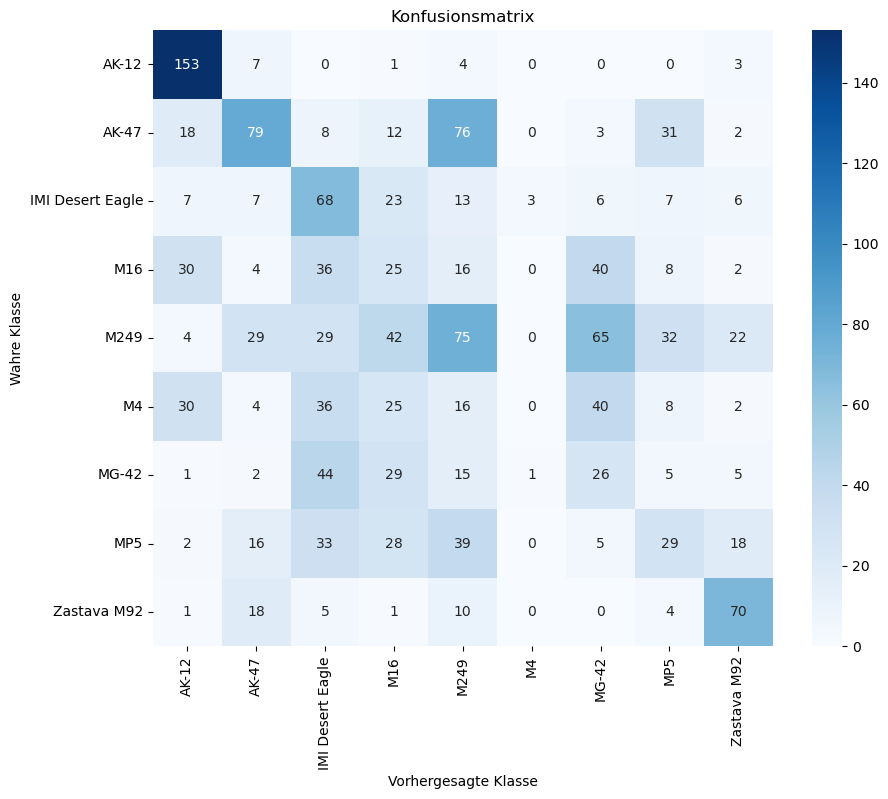

In [17]:
# Parameter festlegen
data_dir = "./melspectogram_60ms_peak/spectrogram_images"
img_height, img_width = 128, 21 # Originalgröße der Spektrogramme
target_height, target_width = 128, 32 # Zielgröße nach Padding

batch_size = 32
epochs_phase1 = 30
epochs_phase2 = 30
validation_split = 0.2

# Data Generator erstellen
datagen = ImageDataGenerator(
    validation_split=validation_split,
    preprocessing_function=preprocess_input # Standard-Normalisierung
)

# Trainingsdaten
train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width), # Lade in Originalgröße
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

# Validierungsdaten
val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width), # Lade in Originalgröße
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Klasseninformationen holen
num_classes = len(train_ds.class_indices)
class_names = list(train_ds.class_indices.keys())
print("Gefundene Klassen:", train_ds.class_indices)

# 2. Modell mit ZeroPadding2D Schicht aufbauen
input_shape_original = (img_height, img_width, 3) # Originalgröße
input_shape_padded = (target_height, target_width, 3) # gepaddete Größe

inputs = Input(shape=input_shape_original)

# Padding als erste Schicht im Modell 
# berechne das benötigte Padding für die Breite
pad_width_total = target_width - img_width
pad_width_left = pad_width_total // 2
pad_width_right = pad_width_total - pad_width_left
# ((top, bottom), (left, right))
x = ZeroPadding2D(padding=((0, 0), (pad_width_left, pad_width_right)))(inputs)

# Das Basis-Modell erwartet jetzt die gepaddete Größe
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape_padded)
base_model.trainable = False 

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)

# Phase 1 des Trainings: Training des Klassifizierungs-Kopfes 
print("\n--- PHASE 1: Training des Klassifizierungs-Kopfes ---")
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_phase1,
    callbacks=[early_stopping],
    verbose=1
)

# Phase 2 des Trainings: Tieferes Fine-Tuning 
print("\n--- PHASE 2: Tieferes Fine-Tuning des gesamten Modells ---")
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 60 
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

total_epochs = len(history_head.history['loss']) + epochs_phase2
history_fine_tune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=len(history_head.history['loss']),
    callbacks=[early_stopping],
    verbose=1
)

# Auswertung
print("\n--- Finale Auswertung auf dem Validierungs-Set ---")
val_loss, val_accuracy = model.evaluate(val_ds, verbose=0)
print(f"Verlust auf Validierungsdaten: {val_loss:.4f}")
print(f"Genauigkeit auf Validierungsdaten: {val_accuracy:.4f}")

# Vorhersagen für den Report und die Matrix
y_pred_probs = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = val_ds.classes

print("\n--- Klassifizierungs-Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Konfusionsmatrix'); plt.ylabel('Wahre Klasse'); plt.xlabel('Vorhergesagte Klasse')
plt.show()

Die finale Evaluierung auf dem Validierungs-Set zeigt eine unzureichende Gesamtleistung des Modells, was sich in einer Genauigkeit von nur 33,6 % und einem hohen Verlust von 1.8302 widerspiegelt. Dieser schwache Gesamteindruck wird durch den Klassifizierungs-Report bestätigt, der eine stark unausgewogene Leistung über die einzelnen Klassen hinweg offenbart. Während die Klassen AK-12 (F1-Score: 0.74) und Zastava M92 (F1-Score: 0.59) noch mit passabler Zuverlässigkeit erkannt werden, zeigt das Modell bei anderen gravierende Schwächen. Besonders kritisch ist der Totalausfall bei der Klasse M4, die zu keinem Zeitpunkt korrekt identifiziert wurde, was sich in Precision, Recall und F1-Scores von 0.00 äußert. Auch weitere Klassen wie M16 (F1-Score: 0.14) oder MG-42 (F1-Score: 0.17) werden nur sehr mangelhaft klassifiziert.

#### Modelltuning a II

Dieser Code implementiert den finalen und robustesten Modellierungsansatz für den 60ms-Multi-Peak-Datensatz. Er kombiniert die erfolgreichen Strategien der vorherigen Versuche, um sowohl technische Hürden als auch Speicherprobleme zu überwinden.

Zuerst wird ein CustomDataGenerator verwendet, um die Bilddaten speichereffizient in kleinen Portionen Batches zu laden. Das Kernstück des Modells ist eine ZeroPadding2D-Schicht, die die schmalen Spektrogrammbilder (128x21 Pixel) durch Hinzufügen schwarzer Ränder auf eine für das EfficientNetB0-Modell kompatible Breite von 32 Pixeln auffüllt, ohne die originalen Daten zu verzerren. Anschließend wird die korrekte preprocess_input-Funktion als Teil des Modells angewendet.

Das Training folgt einem bewährten, zweistufigen Transfer-Learning-Prozess: Zuerst wird nur der neu aufgesetzte Klassifizierungs-Kopf trainiert. Danach werden die oberen Schichten des EfficientNetB0-Basismodells aufgetaut und in einer Fine-Tuning-Phase mit einer sehr niedrigen Lernrate an die spezifischen Merkmale der Spektrogramme angepasst. Abgeschlossen wird der Prozess durch eine detaillierte Auswertung der Modellleistung.

In [18]:
# Laden des DataFrames, der die Pfade zu den 60ms-Spektrogrammen enthält
try:
    cnn_dataset_60ms = pd.read_csv('./melspectogram_60ms_peak/cnn_dataset_multi_peaks.csv')
    print(f"{len(cnn_dataset_60ms)} Bilder im 60ms-Datensatz gefunden.")
except FileNotFoundError:
    print("FEHLER: Die CSV-Datei für den 60ms-Datensatz wurde nicht gefunden.")
    cnn_dataset_60ms = pd.DataFrame()

# Custom Data Generator 
class CustomDataGenerator(Sequence):
    def __init__(self, df, batch_size, target_size, num_classes, label_encoder, shuffle=True):
        self.df = df
        self.batch_size = batch_size
        self.target_size = target_size
        self.num_classes = num_classes
        self.le = label_encoder
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size)

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        batch_df = self.df.iloc[start_index:end_index]
        X, y = self.__data_generation(batch_df)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __data_generation(self, batch_df):
        X_batch = []
        for filepath in batch_df['image_path']:
            img = load_img(filepath, target_size=self.target_size)
            img = img_to_array(img)
            X_batch.append(img)
        labels_encoded = self.le.transform(batch_df['label'])
        y_batch = to_categorical(labels_encoded, num_classes=self.num_classes)
        # Preprocessing wird im Modell gemacht, hier nur die Rohdaten (0-255)
        return np.array(X_batch), np.array(y_batch)

# Datenvorbereitung mit CustomDataGenerator
if not cnn_dataset_60ms.empty:
    img_height, img_width = 128, 21 # Originalgröße
    target_height, target_width = 128, 32 # Zielgröße nach Padding
    batch_size = 32
    epochs_phase1 = 30
    epochs_phase2 = 30
    
    num_classes = cnn_dataset_60ms['label'].nunique()
    class_names = sorted(cnn_dataset_60ms['label'].unique())
    
    # Globaler LabelEncoder
    le_global = LabelEncoder().fit(cnn_dataset_60ms['label'])

    # DataFrame splitten
    train_val_df, test_df = train_test_split(cnn_dataset_60ms, test_size=0.2, stratify=cnn_dataset_60ms['label'], random_state=42)
    train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df['label'], random_state=42)

    # Generatoren instanziieren
    train_generator = CustomDataGenerator(train_df, batch_size, (img_height, img_width), num_classes, le_global)
    val_generator = CustomDataGenerator(val_df, batch_size, (img_height, img_width), num_classes, le_global)
    test_generator = CustomDataGenerator(test_df, batch_size, (img_height, img_width), num_classes, le_global, shuffle=False)

# Modell mit Padding & Preprocessing als Layer aufbauen
if not cnn_dataset_60ms.empty:
    input_shape_original = (img_height, img_width, 3)
    input_shape_padded = (target_height, target_width, 3)

    inputs = Input(shape=input_shape_original)
    
    # Padding als erste Schicht
    pad_width_total = target_width - img_width
    pad_width_left = pad_width_total // 2
    pad_width_right = pad_width_total - pad_width_left
    x = ZeroPadding2D(padding=((0, 0), (pad_width_left, pad_width_right)))(inputs)
    
    # Preprocessing als zweite Schicht
    x = preprocess_input(x)

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape_padded)
    base_model.trainable = False 

    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)

# Training Phase 1
if not cnn_dataset_60ms.empty:
    print("\n--- PHASE 1: Training des Klassifizierungs-Kopfes ---")
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history_head = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs_phase1,
        callbacks=[early_stopping],
        verbose=1
    )

    # Training Phase 2: Tieferes Fine-Tuning 
    print("\n--- PHASE 2: Tieferes Fine-Tuning des gesamten Modells ---")
    base_model.trainable = True
    fine_tune_at = len(base_model.layers) - 60 
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
        
    model.compile(optimizer=Adam(learning_rate=1e-5), 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])

    total_epochs = len(history_head.history['loss']) + epochs_phase2
    history_fine_tune = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=total_epochs,
        initial_epoch=len(history_head.history['loss']),
        callbacks=[early_stopping],
        verbose=1
    )

7843 Bilder im 60ms-Datensatz gefunden.

--- PHASE 1: Training des Klassifizierungs-Kopfes ---
Epoch 1/30
157/157 [==============================] - 36s 194ms/step - loss: 2.0265 - accuracy: 0.2319 - val_loss: 1.8901 - val_accuracy: 0.3139
Epoch 2/30
157/157 [==============================] - 30s 189ms/step - loss: 1.8971 - accuracy: 0.2913 - val_loss: 1.8151 - val_accuracy: 0.3410
Epoch 3/30
157/157 [==============================] - 31s 197ms/step - loss: 1.8424 - accuracy: 0.3132 - val_loss: 1.7363 - val_accuracy: 0.3394
Epoch 4/30
157/157 [==============================] - 30s 193ms/step - loss: 1.7949 - accuracy: 0.3234 - val_loss: 1.6894 - val_accuracy: 0.3713
Epoch 5/30
157/157 [==============================] - 29s 187ms/step - loss: 1.7796 - accuracy: 0.3230 - val_loss: 1.7036 - val_accuracy: 0.3785
Epoch 6/30
157/157 [==============================] - 30s 190ms/step - loss: 1.7366 - accuracy: 0.3515 - val_loss: 1.6631 - val_accuracy: 0.3865
Epoch 7/30
157/157 [===============

#### Modellevaluierung a II


--- Finale Auswertung auf dem Test-Set ---
Verlust auf Testdaten: 1.2093
Genauigkeit auf Testdaten: 0.5672
50/50 [==============================] - 11s 147ms/step

--- Klassifizierungs-Report ---
                  precision    recall  f1-score   support

           AK-12       0.84      0.86      0.85       169
           AK-47       0.63      0.86      0.73       229
IMI Desert Eagle       0.43      0.61      0.51       140
             M16       0.34      0.36      0.35       162
            M249       0.53      0.63      0.58       299
              M4       0.34      0.15      0.21       162
           MG-42       0.54      0.40      0.46       129
             MP5       0.61      0.34      0.43       170
     Zastava M92       0.89      0.72      0.80       109

        accuracy                           0.57      1569
       macro avg       0.57      0.55      0.55      1569
    weighted avg       0.56      0.57      0.55      1569



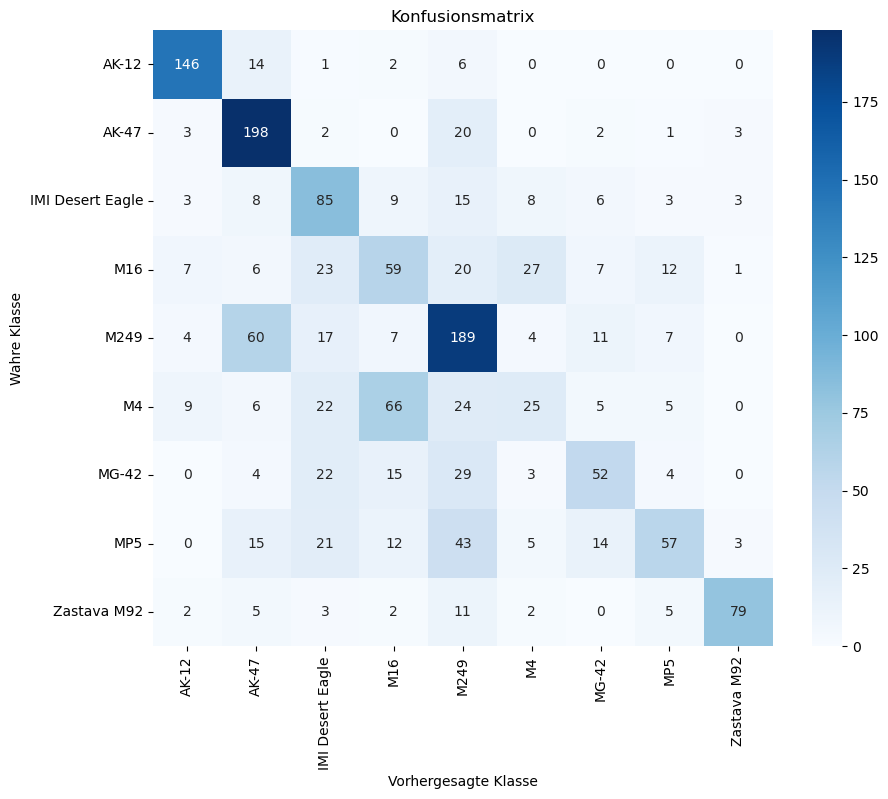

In [19]:
# Auswertung
if not cnn_dataset_60ms.empty:
    print("\n--- Finale Auswertung auf dem Test-Set ---")
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
    print(f"Verlust auf Testdaten: {test_loss:.4f}")
    print(f"Genauigkeit auf Testdaten: {test_accuracy:.4f}")

    y_pred_probs = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = le_global.transform(test_df['label'])

    print("\n--- Klassifizierungs-Report ---")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Konfusionsmatrix'); plt.ylabel('Wahre Klasse'); plt.xlabel('Vorhergesagte Klasse')
    plt.show()

Der finale Modellierungsansatz, der Transfer Learning auf die 60ms-Multi-Peak-Spektrogramme anwendet, stellt das bisher beste und robusteste Ergebnis des Projekts dar. Mit einer finalen Testgenauigkeit von ~57 % wurde eine solide Klassifizierungsleistung erzielt, die deutlich über dem Zufallswert liegt und die Überlegenheit des Transfer-Learning-Ansatzes für dieses komplexe Problem bestätigt.

Die detaillierte Analyse des Klassifizierungs-Reports zeigt ein differenziertes Leistungsbild:

- Stärken: Das Modell demonstriert eine hohe Zuverlässigkeit bei der Erkennung bestimmter Klassen. Insbesondere die AK-12 und Zastava M92 werden mit einem f1-score von 0.85 bzw. 0.80 sehr gut klassifiziert. Auch die AK-47 wird mit 0.73 solide erkannt, was auf klare und erlernbare Muster in diesen Spektrogrammen hindeutet.

- Schwächen: Gleichzeitig offenbaren die Ergebnisse deutliche Schwierigkeiten bei klanglich sehr ähnlichen oder weniger ausgeprägten Waffenklassen. Die M4, M16 und MP5 weisen die niedrigsten f1-scores auf, was auf eine hohe Verwechslungsrate untereinander und mit anderen Klassen hindeutet. Insbesondere der niedrige Recall-Wert der M4 (0.15) zeigt, dass das Modell diese Waffe nur selten korrekt identifiziert, wenn sie tatsächlich vorliegt.

## IV. Fazit und Anmerkungen

### Ergebnis

Durch ihre Faltungs-Schichten (Convolutional Layers) können Convolutional Neural Networks (CNNs) die lokale Struktur der Spektrogramme berücksichtigen und hierarchische Muster – von einfachen Kanten und Texturen bis hin zu komplexen Klangsignaturen – zuverlässig erkennen. Dennoch zeigten die von Grund auf trainierten CNN-Modelle in diesem Projekt eine starke Tendenz zum Overfitting. Der relativ kleine Datensatz reichte nicht aus, um ein so komplexes Modell ohne das reine Auswendiglernen der Trainingsbeispiele zu trainieren. Auch die Bestrebungen der vorliegenden Arbeit den Datensatz zu adaptieren führten nicht zur gewünschten Accuracy. Einerseits beinhaltete dies die Verkürzung der Dateien auf eine Sekunde um den höchsten Peak einer jeden Datei. Andererseits wurden auch mehrere Peaks anhand des RMS-Medians identifiziert und auf eine Länge von jeweils 60ms gekürzt.

Aus diesem Grund wurde als finale und erfolgreichste Strategie der Transfer-Learning-Ansatz gewählt. Anstatt dem Modell das **Sehen** von Grund auf beizubringen, wird das Wissen eines bereits auf Millionen von Bildern vortrainierten Expertenmodells (EfficientNetB0) genutzt. Dieses Modell agiert als ein hochkompetenter Merkmalsextraktor, der bereits ein tiefes Verständnis für universelle visuelle Muster besitzt. Auf dieses "eingefrorene" Fundament wird ein neuer, kleiner Klassifizierungs-Teil aufgesetzt, der spezifisch für die 9 Waffenklassen trainiert wird. In einer anschließenden Fine-Tuning-Phase werden die oberen Schichten des Experten-Modells ebenfalls leicht angepasst, um das Wissen optimal auf die Besonderheiten von Audiospektrogrammen zu übertragen. Dieser Ansatz umgeht das Problem des Overfittings, ist weitaus dateneffizienter und führt zu einer signifikant besseren Generalisierungsleistung. Dieses Vorgehen in Kombination mit den auf 60ms gekürzten Audio-Dateien mit einem RMS-Threshold mit einem Faktor von 7 erreichte die höchste Accuracy aller Modellansätze dieser Arbeit mit einem Wert von 57% auf den unbekannten Testdaten. Besonders schwierig erwiesen sich die Zuordnungen der Waffenklassen, die einer ähnlichen Kalibergruppe angehören. Auch verschiedene Schussmuster (Einfach- und Mehrfachschüsse) innerhalb der gleichen Waffenkategorie erschwerten das Modelltraining.

### Ähnliche Untersuchungen und Ausblick

[Raponi et al. (2022)](https://doi.org/10.1007/s11042-022-12612-w) entwickelten ein CNN-Modell für die Klassifikation von Schusswaffen und nutzten einen Datensatz, welcher 3655 Audioclips und 59 unterschiedliche Waffen umfasste. Zum Training des CNNs wurden ebenfalls Spektrogramme verwendet. Es gelang ihnen, die Kategorie, das Kaliber und das Modell der Waffe mit einer Genauigkeit von 90% zu identifizieren. Untersuchungen mit ähnlichen Fragestellungen verfolgten zudem die folgenden Studien:

* [Ellen und Linnea (2022)](https://lup.lub.lu.se/luur/download?func=downloadFile&recordOId=9090317&fileOId=9090321) verfolgten in Ihrer Abschlussarbeit das Ziel, mit einem CNN eine Schusserkennung in Echtzeit auch auf kleinen tragfähigen Geräten zu ermöglichen, ohne dabei Speicherkapazität, Batterielaufzeit oder CPU-Leistung zu sehr zu beanspruchen. Sie nutzten MFCCs als Feature-Extraktions-Methode im Preprocessing und implementierten anschließend ein CNN mit vier Layern, um Schüsse zu erkennen. Zum Trainieren des CNNs verwendeten sie einen öffentlichen Datensatz mit unterschiedlichen Alltagsgeräuschen und erstellten zusätzlich einen Datensatz mit selbst aufgenommenen Schussgeräuschen. Mit ihrem Modell konnten sie eine durchschnittliche Präzision von 0,97 und einen F1-Score von 0,95 erreichen. Letztlich konnten sie zeigen, dass mit einer Latenz von drei bis vier Sekunden eine automatische Schusserkennung auf einer am Körper getragenen Kamera mit ihrem trainierten CNN-Modell möglich war.
* [Dogan (2021)](https://doi.org/10.1016/j.apacoust.2021.107916) hat einen Datensatz mit 2130 Audioclips von 28 verschiedenen Schusswaffenmodellen untersucht. Zum Einsatz kamen hierbei ein neuartiges fraktales H-Baum-Muster sowie eine statistische Merkmalsextraktion innerhalb der Merkmalsextraktionsphase. Anschließend wurden unter Verwendung einer Neighborhood Component Analysis (NCA) die informativsten Merkmale ausgewählt. Mittels k Nearest Neighbor und Support Vector Machines als Klassifikatoren konnte schließlich eine Genauigkeit von 96,10% bzw. 90,85% erzielt werden.
* [Li et al. (2022)](https://doi.org/10.3390/app12115526) haben eine Identifikationsmethode für Schusswaffen basierend auf Wissensdestillation entwickelt. Im Gegensatz zu Transfer Learning erreichte die Methode der Wissensdestillation in ihrer Untersuchung eine höhere Genauigkeit auf zwei verschiedenen Datensätzen, und zwar einmal 95,6% und einmal 83,5%.

Aspekte, die in nachfolgenden Untersuchungen Berücksichtigung finden können, sind zum einen Geräusche wie explodierende Plastiktüten oder zuschlagende Metalltüren, welche so ähnlich wie Schüsse klingen. Diese können ein Deep Learning Modell vor Herausforderungen stellen ([Singh et al., 2021](https://doi.org/10.3390/s21217320)). In unserer Untersuchung konnten wir uns nicht auf derartige Geräusche zusätzlich fokussieren. Zum anderen wurde der in der Projekteinführung beschriebene Ansatz, die Analyse und Modellierung auf komprimierte Dateien anzuwenden, nicht weiter verfolgt, da die bisherigen Modellergebnisse nicht die gewünschte Accuracy auf dem Testdatensatz aufwiesen.